# Leveraging Machine Learning for Predicting and Identifying Determinants of () in the London Area

## Introduction and literature review


### research question

This report will use supervised learning methods to investigate the crime number in each borough in London to explore which factors will affect the crime number, and is it possible to predict its crime number? 

## Presentation of Data and Data preprocessing 


### import data package

This section provides an overview of the packages utilized in the analysis, along with a brief explanation of their roles.

In [1]:
import numpy as np

#data import and handle data
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error
from scipy import stats


# preprocessors
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

#Import plot package
import matplotlib.pyplot as plt
import seaborn as sns
#regression model
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
# pipeline
from sklearn.pipeline import Pipeline

# CART
from sklearn.tree import DecisionTreeRegressor

# random forest
from sklearn.ensemble import RandomForestRegressor

# feature importance
import rfpimp

# xgboost
import xgboost
from xgboost import XGBRegressor


import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
import statistics 
import seaborn as sns
from IPython.display import display, Math, Latex, display_latex
import plotly.express as px
import pylab

%matplotlib inline  

In [2]:
#pre set the default property
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("dark")

### Data import

The data is sourced from https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set and stored at https://raw.githubusercontent.com/Raye-Cheng/0006Data/main/Real_estate_valuation_dataset.csv. 

It contains the estimated price per unit area of houses in Taiwan, which serves as the dependent variable, along with five independent variables: house age, distance to the nearest MRT station, number of convenience stores, latitude, and longitude.

The transaction date variable has two components, year and month, with the month component being a categorical variable.

In [3]:
import pandas as pd

# 用逗号分隔符读取表格文件，如果文件不是csv格式，根据实际情况调整参数
# 如果表格文件不是UTF-8编码，可以指定其他编码，如encoding='latin-1'
df = pd.read_csv('DataToUse.csv', sep=',')

# 检查是否存在NaN值
if df.isnull().values.any():
    # 将所有NaN值替换为0
    df.fillna(0, inplace=True)

# 如果你只想替换特定列的NaN值，可以使用下面的代码，假设要替换'Crime_number'列和其他列的NaN值：
df['Crime_number'].fillna(0, inplace=True)
df['16-18_not_in_education_employment_or_training'].fillna(0, inplace=True)
df['Children_in_poverty_under20'].fillna(0, inplace=True)
df['Any_neurotic_disorder_per_1000_people'].fillna(0, inplace=True)
df['UnemploymentRate'].fillna(0, inplace=True)
df['Percent_GoodAccessToPublic_OpenSpace'].fillna(0, inplace=True)
df['Percent_green'].fillna(0, inplace=True)
df['Population_per_square_kilometre'].fillna(0, inplace=True)

# 将修改后的数据保存回文件，如果不想修改源文件，可以另存为新文件
df.to_csv('modified_file_path.csv', index=False, sep=',')


In [4]:
df=pd.read_csv('DataToUse.csv')
df.head(10)


Borough_Name Borough_Code  Crime_number  \
0        City of London    E09000001          1579   
1  Barking and Dagenham    E09000002         17998   
2                Barnet    E09000003         26642   
3                Bexley    E09000004         15175   
4                 Brent    E09000005         27911   
5               Bromley    E09000006         21420   
6                Camden    E09000007         29041   
7               Croydon    E09000008         31718   
8                Ealing    E09000009         28248   
9               Enfield    E09000010         27868   

   16-18_not_in_education_employment_or_training  Children_in_poverty_under20  \
0                                              0                           95   
1                                            460                        17150   
2                                            250                        14600   
3                                            290                         9875   
4                                            280                        18865   
5                                            450                        10960   
6                                            190                        11285   
7                                            470                        19810   
8                                            320                        17730   
9                                            380                        24275   

   Any_neurotic_disorder_per_1000_people  \
0                                    191   
1                                    178   
2                                    167   
3                                    156   
4                                    182   
5                                    158   
6                                    206   
7                                    172   
8                                    174   
9                                    171   

                          UnemploymentRate  \
0                                   0.0000   
1                                   7.6000   
2                                   6.4000   
3                                   5.1000   
4                                   6.4000   
5                                   4.7000   
6                                   4.7000   
7                                   6.6000   
8                                   6.7000   
9                                   7.1000   

      Percent_GoodAccessToPublic_OpenSpace  \
0                                   0.0000   
1                                   0.3300   
2                                   0.1400   
3                                   0.0000   
4                                   0.0000   
5                                   0.0000   
6                                  16.7300   
7                                   0.0000   
8                                  10.8100   
9                                  21.8100   

                             Percent_green  \
0                                   5.5900   
1                                  39.2000   
2                                  57.9900   
3                                  42.9200   
4                                  39.9400   
5                                  68.3600   
6                                  43.2800   
7                                  55.5300   
8                                  43.9600   
9                                  52.9500   

           Population_per_square_kilometre  
0                               2,770.7200  
1                               6,047.6400  
2                               4,693.4400  
3                               4,208.7700  
4                               7,953.5500  
5                               2,240.6200  
6                              11,812.4100  
7                               4,627.2300  
8                               6,514.3100  
9                               4,243.2800

### check about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Borough_Name                                   33 non-null     object 
 1   Borough_Code                                   33 non-null     object 
 2   Crime_number                                   33 non-null     int64  
 3   16-18_not_in_education_employment_or_training  33 non-null     int64  
 4   Children_in_poverty_under20                    33 non-null     int64  
 5   Any_neurotic_disorder_per_1000_people          33 non-null     int64  
 6   UnemploymentRate                               33 non-null     float64
 7   Percent_GoodAccessToPublic_OpenSpace           33 non-null     float64
 8   Percent_green                                  33 non-null     float64
 9   Population_per_square_kilometre                33 non-nu

In [6]:
df.isnull().values.any()

False

### Variables Visualization

In [7]:
print(df.dtypes)

Borough_Name                                      object
Borough_Code                                      object
Crime_number                                       int64
16-18_not_in_education_employment_or_training      int64
Children_in_poverty_under20                        int64
Any_neurotic_disorder_per_1000_people              int64
UnemploymentRate                                 float64
Percent_GoodAccessToPublic_OpenSpace             float64
Percent_green                                    float64
Population_per_square_kilometre                  float64
dtype: object


/Users/raynecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/raynecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/raynecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

<AxesSubplot:xlabel='Population_per_square_kilometre', ylabel='Density'>

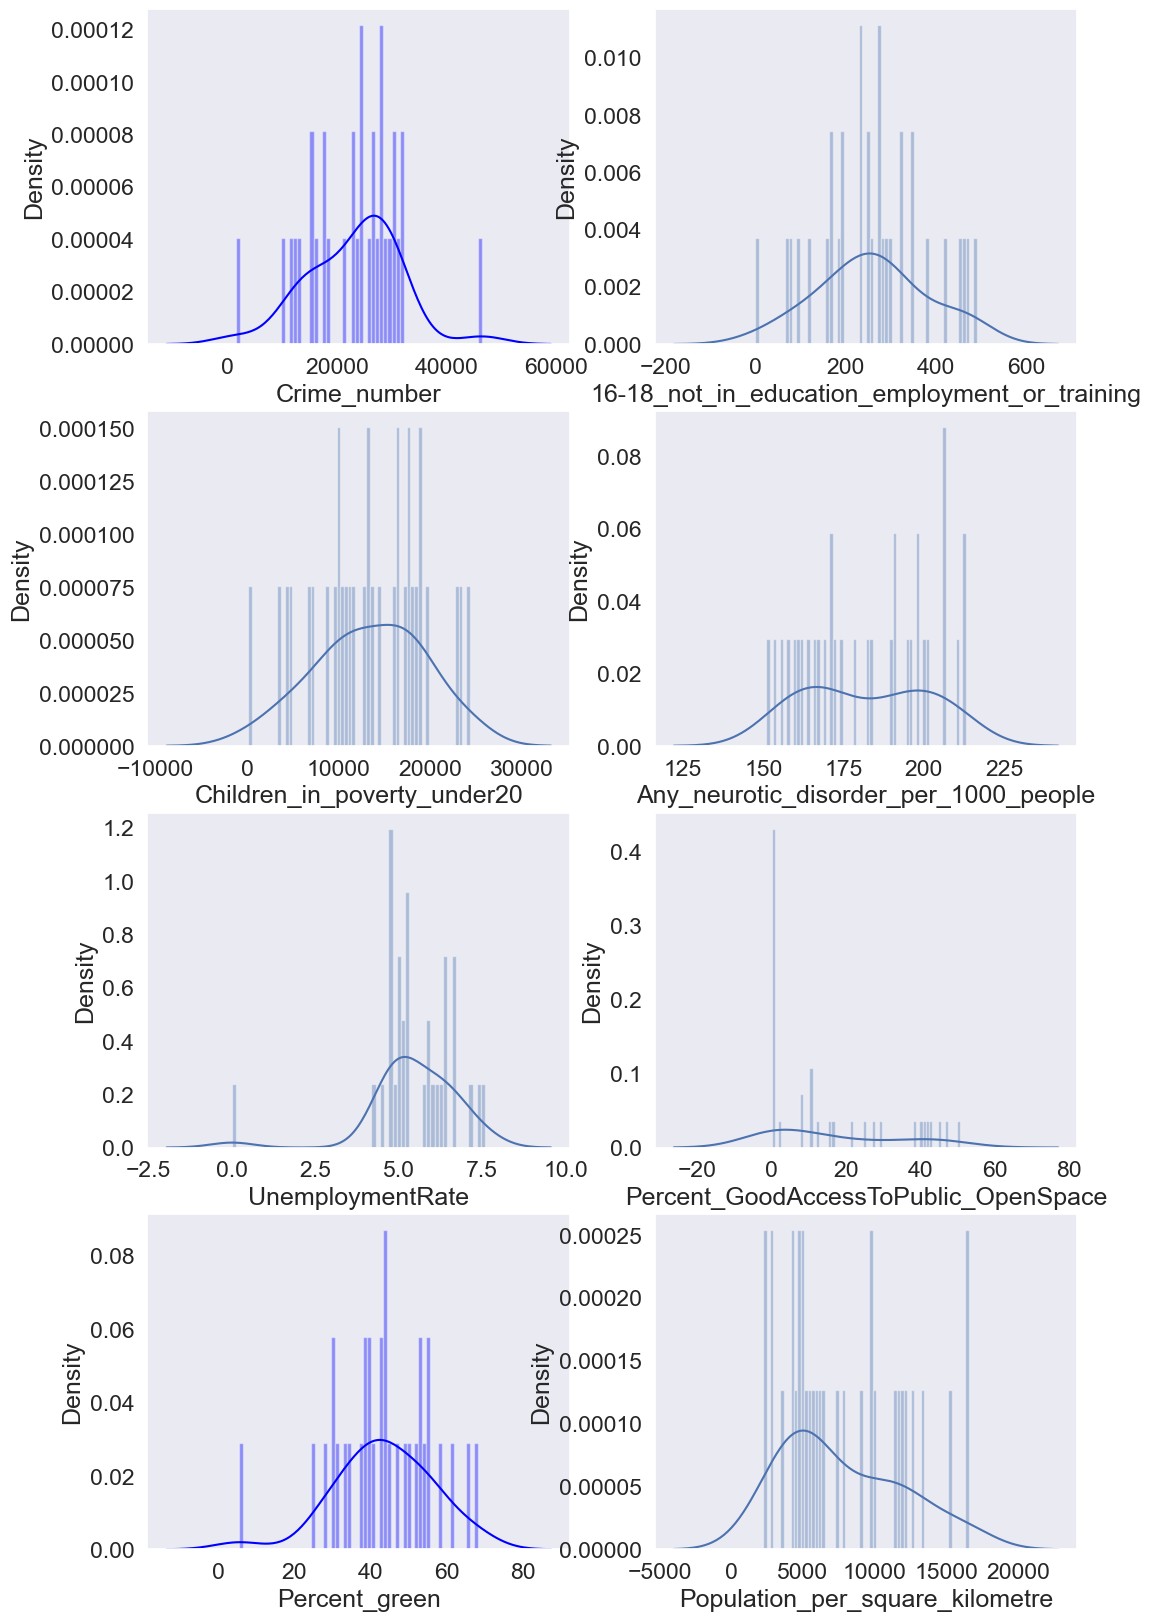

In [34]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(12,20)
sns.distplot(df['Crime_number'], bins = 60, ax=axes[0,0],color="blue")
sns.distplot(df['16-18_not_in_education_employment_or_training'], bins = 60, ax=axes[0,1])
sns.distplot(df['Children_in_poverty_under20'], bins = 60, ax=axes[1,0])
sns.distplot(df['Any_neurotic_disorder_per_1000_people'], bins = 60, ax=axes[1,1])
sns.distplot(df['UnemploymentRate'], bins = 60, ax=axes[2,0])
sns.distplot(df['Percent_GoodAccessToPublic_OpenSpace'], bins = 60, ax=axes[2,1])
sns.distplot(df['Percent_green'], bins = 60, ax=axes[3,0],color="blue")
sns.distplot(df['Population_per_square_kilometre'], bins = 60, ax=axes[3,1])



/Users/raynecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raynecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/raynecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

<AxesSubplot:xlabel='Population_per_square_kilometre'>

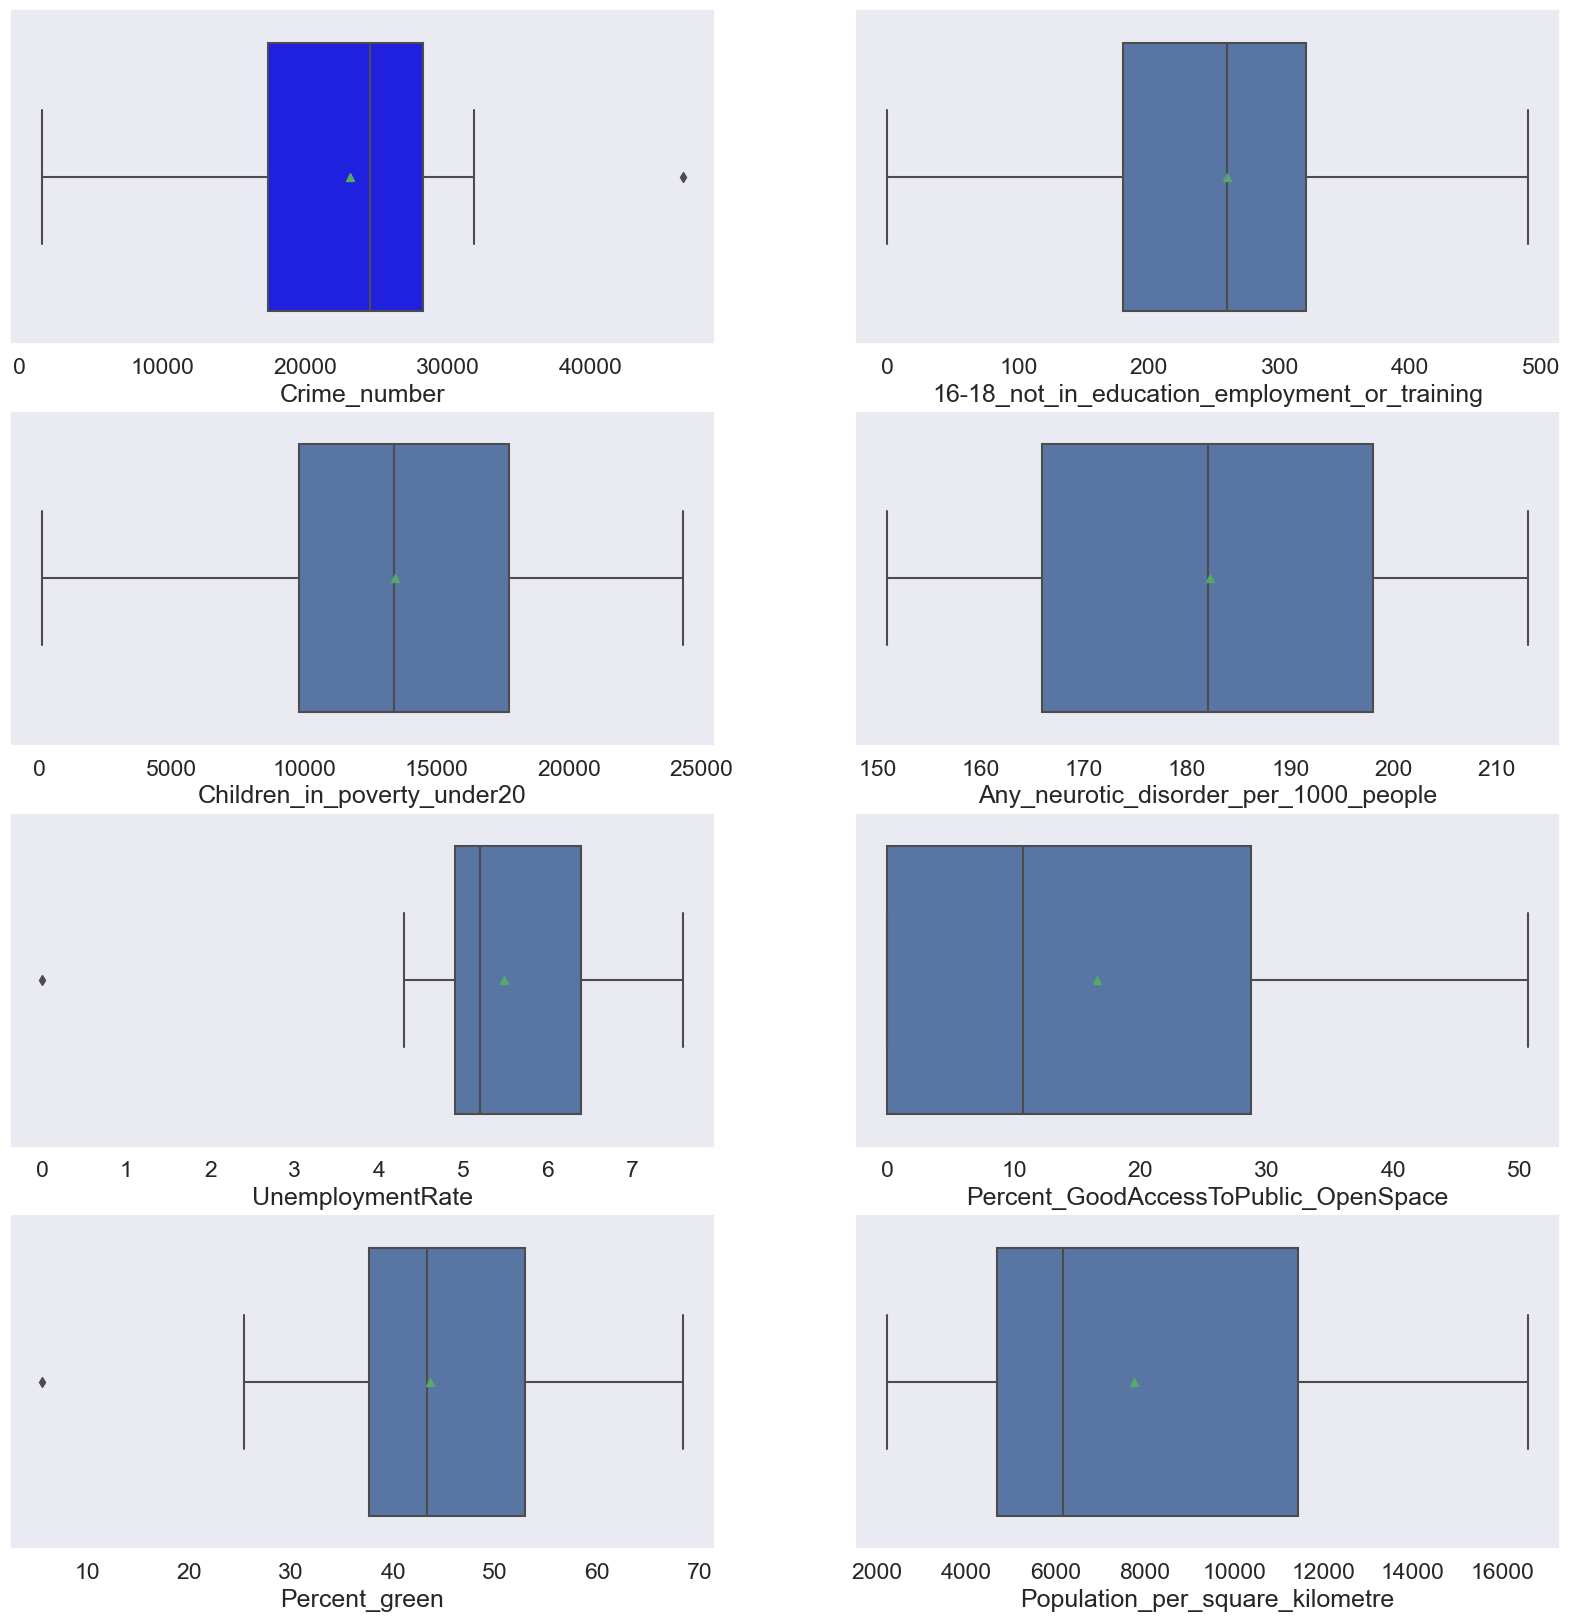

In [35]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(20,20)


sns.boxplot(df['Crime_number'], ax=axes[0,0],color="blue",showmeans=True,sym = '*' )
sns.boxplot(df['16-18_not_in_education_employment_or_training'], ax=axes[0,1],showmeans=True )
sns.boxplot(df['Children_in_poverty_under20'], ax=axes[1,0],showmeans=True )
sns.boxplot(df['Any_neurotic_disorder_per_1000_people'], ax=axes[1,1],showmeans=True )
sns.boxplot(df['UnemploymentRate'],  ax=axes[2,0],showmeans=True )
sns.boxplot(df['Percent_GoodAccessToPublic_OpenSpace'], ax=axes[2,1],showmeans=True )
sns.boxplot(df['Percent_green'], ax=axes[3,0],showmeans=True )
sns.boxplot(df['Population_per_square_kilometre'], ax=axes[3,1],showmeans=True )

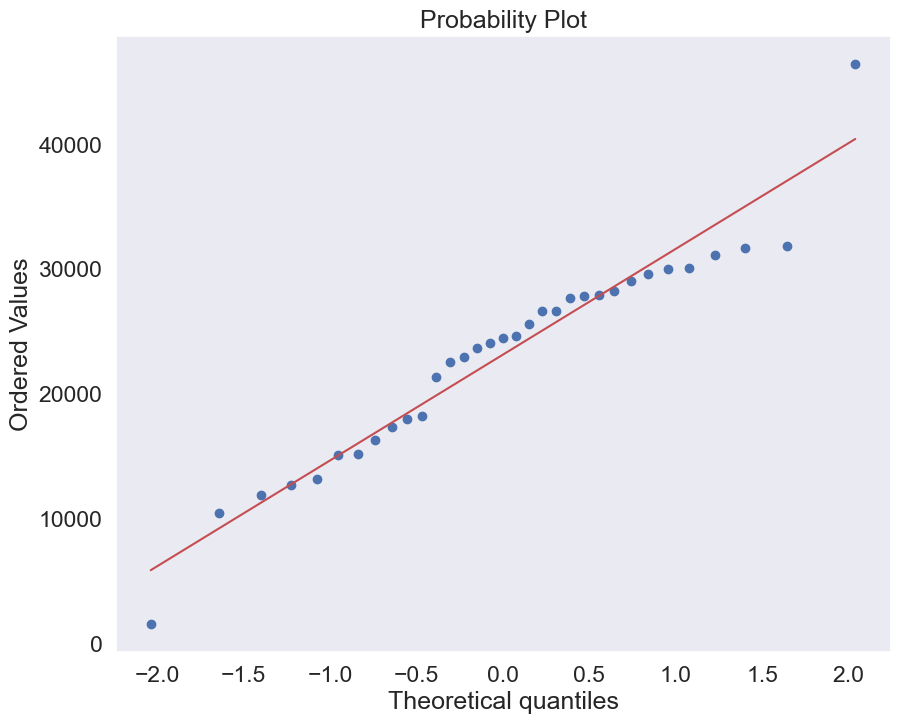

In [10]:
plt = stats.probplot(df['Crime_number'], plot = sns.mpl.pyplot)

In [11]:
def filter_outliers(var):
    q1 = var.quantile(0.25) 
    q3 = var.quantile(0.75) 
    inter = q3 - q1 
    low = q1 - 3*inter 
    high = q3 + 3*inter 
    filtered = df[(var > low) & (var < high)] 
    dropped_observations= len(var)-len(filtered) 

    print('Dropped {} observations'.format(dropped_observations))
    return  filtered

valuation=filter_outliers(df['Crime_number']) # filter outliers from distance to mrt


Dropped 0 observations


In [12]:
summary=df.describe().round(2).T
summary[['count','mean','std','min','max']]

count  \
Crime_number                                                                   33.0000   
16-18_not_in_education_employment_or_training                                  33.0000   
Children_in_poverty_under20                                                    33.0000   
Any_neurotic_disorder_per_1000_people                                          33.0000   
UnemploymentRate                                                               33.0000   
Percent_GoodAccessToPublic_OpenSpace                                           33.0000   
Percent_green                                                                  33.0000   
Population_per_square_kilometre                                                33.0000   

                                                                                  mean  \
Crime_number                                                               23,175.5500   
16-18_not_in_education_employment_or_training                                 259.3900   
Children_in_poverty_under20                                                13,402.2700   
Any_neurotic_disorder_per_1000_people                                         182.2400   
UnemploymentRate                                                                5.4800   
Percent_GoodAccessToPublic_OpenSpace                                           16.5700   
Percent_green                                                                  43.6200   
Population_per_square_kilometre                                             7,767.0700   

                                                                                   std  \
Crime_number                                                                8,430.2700   
16-18_not_in_education_employment_or_training                                 121.1400   
Children_in_poverty_under20                                                 5,945.3900   
Any_neurotic_disorder_per_1000_people                                          19.3200   
UnemploymentRate                                                                1.3200   
Percent_GoodAccessToPublic_OpenSpace                                           17.6700   
Percent_green                                                                  12.8100   
Population_per_square_kilometre                                             4,181.0900   

                                                                                   min  \
Crime_number                                                                1,579.0000   
16-18_not_in_education_employment_or_training                                   0.0000   
Children_in_poverty_under20                                                    95.0000   
Any_neurotic_disorder_per_1000_people                                         151.0000   
UnemploymentRate                                                                0.0000   
Percent_GoodAccessToPublic_OpenSpace                                            0.0000   
Percent_green                                                                   5.5900   
Population_per_square_kilometre                                             2,240.6200   

                                                                                   max  
Crime_number                                                               46,429.0000  
16-18_not_in_education_employment_or_training                                 490.0000  
Children_in_poverty_under20                                                24,275.0000  
Any_neurotic_disorder_per_1000_people                                         213.0000  
UnemploymentRate                                                                7.6000  
Percent_GoodAccessToPublic_OpenSpace                                           50.6800  
Percent_green                                                                  68.3600  
Population_per_square_kilometre                                            16,583.5100

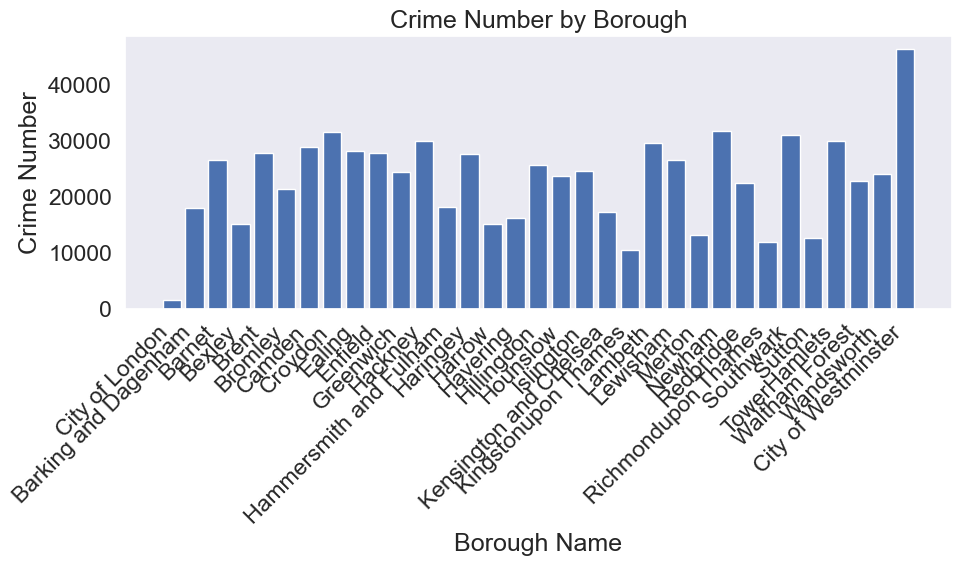

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
df = pd.read_csv('DataToUse.csv')

# 提取"Crime_number"列的数据
crime_numbers = df['Crime_number']

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(df['Borough_Name'], crime_numbers)
plt.xlabel('Borough Name')
plt.ylabel('Crime Number')
plt.title('Crime Number by Borough')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## in sequence for crime number in borough


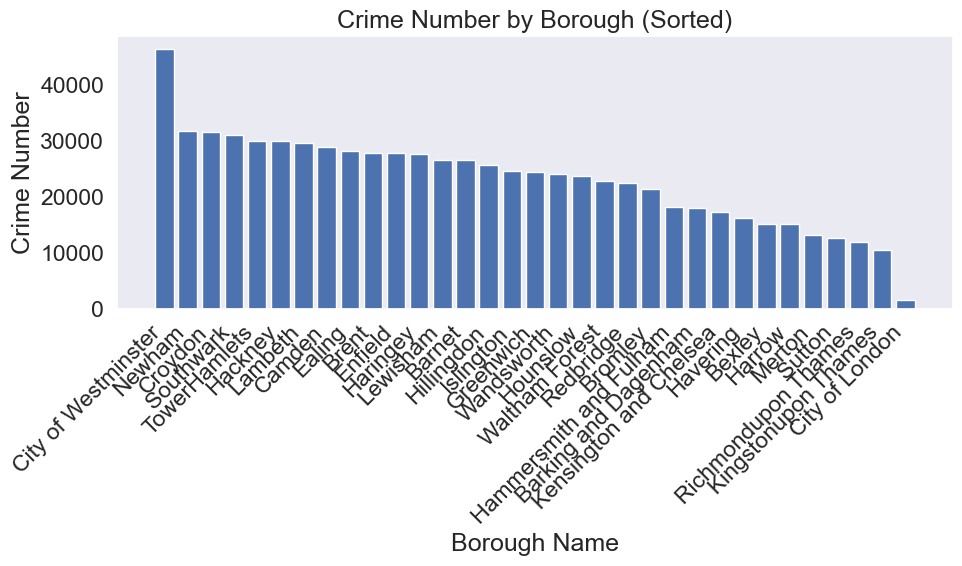

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
df = pd.read_csv('DataToUse.csv')

# 按"Crime_number"数量排序
df_sorted = df.sort_values(by='Crime_number', ascending=False)

# 创建柱状图
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Borough_Name'], df_sorted['Crime_number'])
plt.xlabel('Borough Name')
plt.ylabel('Crime Number')
plt.title('Crime Number by Borough (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


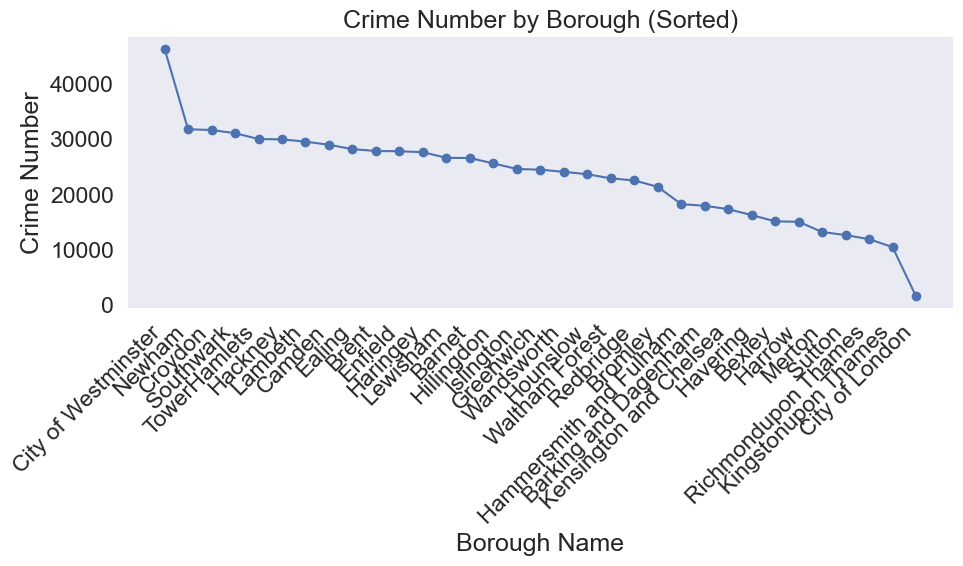

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
df = pd.read_csv('DataToUse.csv')

# 按"Crime_number"数量排序
df_sorted = df.sort_values(by='Crime_number', ascending=False)

# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Borough_Name'], df_sorted['Crime_number'], marker='o', linestyle='-', color='b')
plt.xlabel('Borough Name')
plt.ylabel('Crime Number')
plt.title('Crime Number by Borough (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


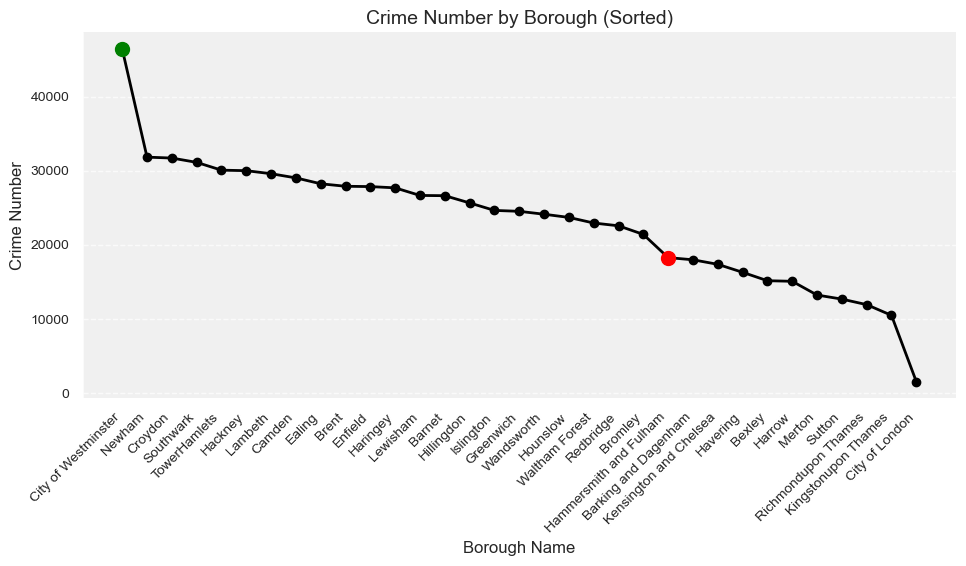

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
df = pd.read_csv('DataToUse.csv')

# 按"Crime_number"数量排序
df_sorted = df.sort_values(by='Crime_number', ascending=False)

# 创建折线图
plt.figure(figsize=(10, 6))

# Plotting the main data points with black color
plt.plot(df_sorted['Borough_Name'], df_sorted['Crime_number'], marker='o', linestyle='-', color='black', linewidth=2)

# Emphasizing the 23rd borough with a different color
plt.plot(df_sorted.iloc[22]['Borough_Name'], df_sorted.iloc[22]['Crime_number'], marker='o', markersize=10, color='red')

# Emphasizing the first borough (highest crime number) with a different color
plt.plot(df_sorted.iloc[0]['Borough_Name'], df_sorted.iloc[0]['Crime_number'], marker='o', markersize=10, color='green')

# Customizing the plot
plt.xlabel('Borough Name', fontsize=12)
plt.ylabel('Crime Number', fontsize=12)
plt.title('Crime Number by Borough (Sorted)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


In [19]:
#conda install -c conda-forge geopandas

In [20]:
#conda install matplotlib


In [21]:
import geopandas as gpd


In [22]:
fp = "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(fp)
#检查数据类型，以便我们可以看到这不是一个正常的数据框架，而是一个GEO数据框架
map_df.head(20)

NAME   GSS_CODE                                 HECTARES  \
0   Kingston upon Thames  E09000021                               3,726.1170   
1                Croydon  E09000008                               8,649.4410   
2                Bromley  E09000006                              15,013.4870   
3               Hounslow  E09000018                               5,658.5410   
4                 Ealing  E09000009                               5,554.4280   
5               Havering  E09000016                              11,445.7350   
6             Hillingdon  E09000017                              11,570.0630   
7                 Harrow  E09000015                               5,046.3300   
8                  Brent  E09000005                               4,323.2700   
9                 Barnet  E09000003                               8,674.8370   
10               Lambeth  E09000022                               2,724.9400   
11             Southwark  E09000028                               2,991.3400   
12              Lewisham  E09000023                               3,531.7060   
13             Greenwich  E09000011                               5,044.1900   
14                Bexley  E09000004                               6,428.6490   
15               Enfield  E09000010                               8,220.0250   
16        Waltham Forest  E09000031                               3,880.7930   
17             Redbridge  E09000026                               5,644.2250   
18                Sutton  E09000029                               4,384.6980   
19  Richmond upon Thames  E09000027                               5,876.1110   

                                 NONLD_AREA ONS_INNER SUB_2009 SUB_2006  \
0                                    0.0000         F     None     None   
1                                    0.0000         F     None     None   
2                                    0.0000         F     None     None   
3                                   60.7550         F     None     None   
4                                    0.0000         F     None     None   
5                                  210.7630         F     None     None   
6                                    0.0000         F     None     None   
7                                    0.0000         F     None     None   
8                                    0.0000         F     None     None   
9                                    0.0000         F     None     None   
10                                  43.9270         T     None     None   
11                                 105.1390         T     None     None   
12                                  16.7950         T     None     None   
13                                 310.7850         F     None     None   
14                                 370.6190         F     None     None   
15                                   0.0000         F     None     None   
16                                   0.0000         F     None     None   
17                                   2.3000         F     None     None   
18                                   0.0000         F     None     None   
19                                 135.4430         F     None     None   

                                             geometry  
0   POLYGON ((516401.600 160201.800, 516407.300 16...  
1   POLYGON ((535009.200 159504.700, 535005.500 15...  
2   POLYGON ((540373.600 157530.400, 540361.200 15...  
3   POLYGON ((521975.800 178100.000, 521967.700 17...  
4   POLYGON ((510253.500 182881.600, 510249.900 18...  
5   POLYGON ((549893.900 181459.800, 549894.600 18...  
6   POLYGON ((510599.800 191689.500, 510615.200 19...  
7   POLYGON ((510599.800 191689.500, 510660.000 19...  
8   POLYGON ((525201.000 182512.600, 525181.500 18...  
9   POLYGON ((524579.900 198355.200, 524594.300 19...  
10  POLYGON ((530046.800 177893.400, 530048.400 17...  
11  POLYGON ((531335.600 180529.500, 531337.700 18...  
12  POLYGON ((536691.000 178958.600

<AxesSubplot:>

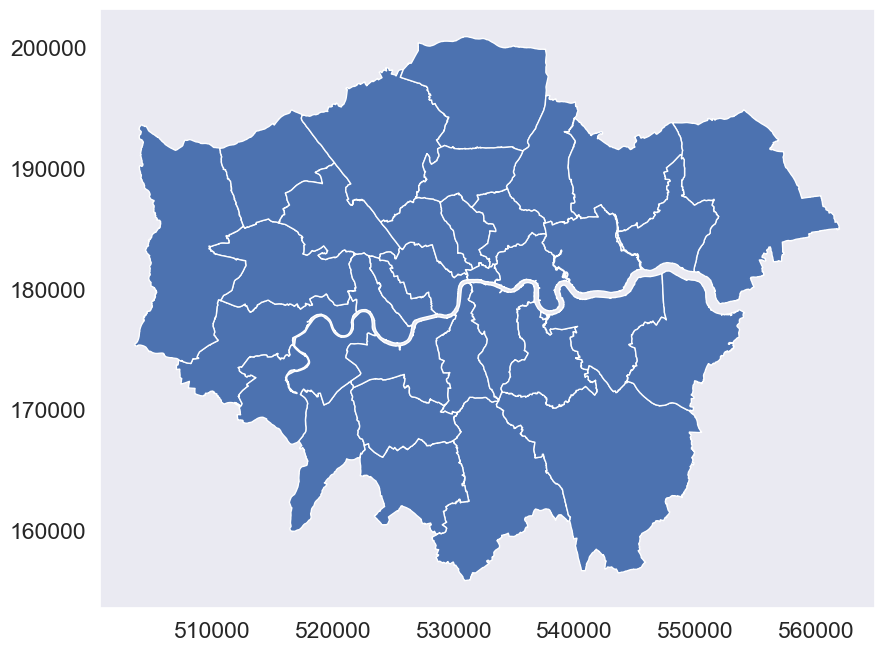

In [23]:
map_df.plot()

In [24]:
merged = map_df.set_index('NAME').join(df.set_index('Borough_Name'))
merged.head(20)

GSS_CODE                                 HECTARES  \
NAME                                                                       
Kingston upon Thames  E09000021                               3,726.1170   
Croydon               E09000008                               8,649.4410   
Bromley               E09000006                              15,013.4870   
Hounslow              E09000018                               5,658.5410   
Ealing                E09000009                               5,554.4280   
Havering              E09000016                              11,445.7350   
Hillingdon            E09000017                              11,570.0630   
Harrow                E09000015                               5,046.3300   
Brent                 E09000005                               4,323.2700   
Barnet                E09000003                               8,674.8370   
Lambeth               E09000022                               2,724.9400   
Southwark             E09000028                               2,991.3400   
Lewisham              E09000023                               3,531.7060   
Greenwich             E09000011                               5,044.1900   
Bexley                E09000004                               6,428.6490   
Enfield               E09000010                               8,220.0250   
Waltham Forest        E09000031                               3,880.7930   
Redbridge             E09000026                               5,644.2250   
Sutton                E09000029                               4,384.6980   
Richmond upon Thames  E09000027                               5,876.1110   

                                                   NONLD_AREA ONS_INNER  \
NAME                                                                      
Kingston upon Thames                                   0.0000         F   
Croydon                                                0.0000         F   
Bromley                                                0.0000         F   
Hounslow                                              60.7550         F   
Ealing                                                 0.0000         F   
Havering                                             210.7630         F   
Hillingdon                                             0.0000         F   
Harrow                                                 0.0000         F   
Brent                                                  0.0000         F   
Barnet                                                 0.0000         F   
Lambeth                                               43.9270         T   
Southwark                                            105.1390         T   
Lewisham                                              16.7950         T   
Greenwich                                            310.7850         F   
Bexley                                               370.6190         F   
Enfield                                                0.0000         F   
Waltham Forest                                         0.0000         F   
Redbridge                                              2.3000         F   
Sutton                                                 0.0000         F   
Richmond upon Thames                                 135.4430         F   

                     SUB_2009 SUB_2006  \
NAME                                     
Kingston upon Thames     None     None   
Croydon                  None     None   
Bromley                  None     None   
Hounslow                 None     None   
Ealing                   None     None   
Havering                 None     None   
Hillingdon               None     None   
Harrow                   None     None   
Brent                    None     None   
Barnet                   None     None   
Lambeth                  None     None   
Southwark                None     None   
Lewisham                 None     None   
Greenwich                None     None   
Bexley                   No

In [25]:
import matplotlib.pyplot as plt


Text(51.39148871750204, 0.5, 'Latitude')

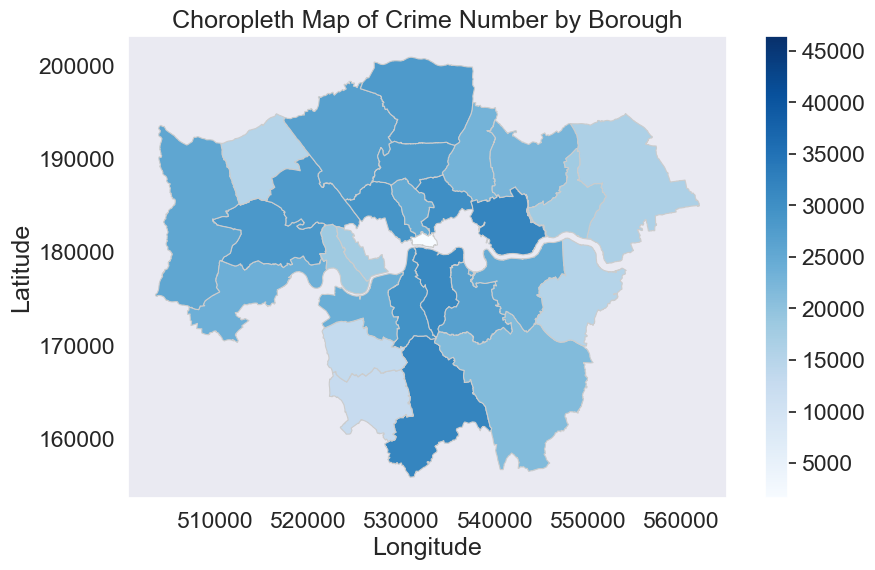

In [26]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Crime_number'
# set the range for the choropleth
vmin, vmax = df[variable].min(), df[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
# 创建 choropleth 图
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

# 设置图形标题和坐标轴标签
plt.title('Choropleth Map of Crime Number by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

/var/folders/b8/6xhpnddj0_5776w3_h29g3cm0000gn/T/ipykernel_17946/2539354767.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total_Crime'] = df.sum(axis=1)


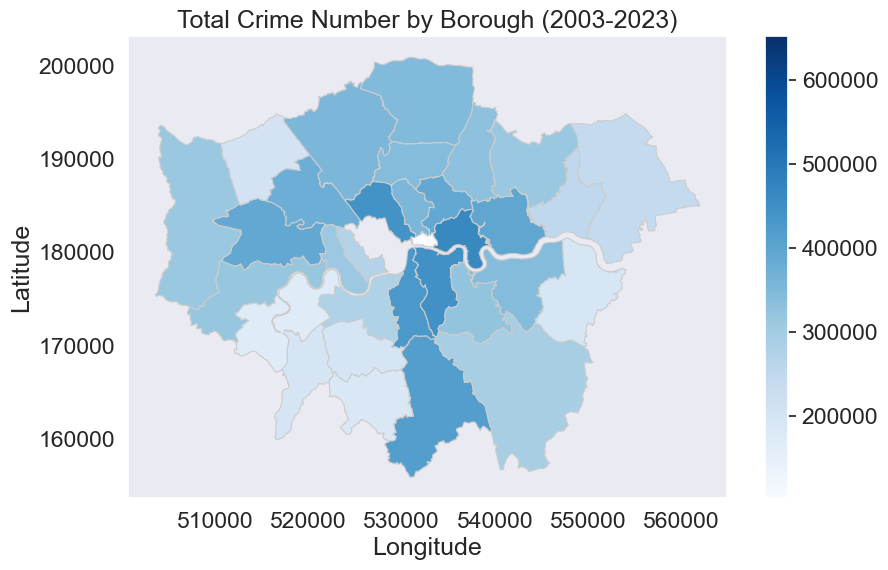

In [44]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. 加载数据
df = pd.read_csv('MonthlyCrimeNum03-23.csv')

# 2. 计算03-23年每个地区的总犯罪数量
df['Total_Crime'] = df.sum(axis=1)

# 3. 加载伦敦各区域的地理边界数据集
gdf = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')  # 请替换为你的地理边界数据文件路径


# 4. 将计算得到的犯罪数量与地理数据集合并
merged = gdf.set_index('NAME').join(df.set_index('Borough_Name'))

# 5. 创建choropleth图
variable = 'Total_Crime'
vmin, vmax = df['Total_Crime'].min(), df['Total_Crime'].max()

fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)
plt.title('Total Crime Number by Borough (2003-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/var/folders/b8/6xhpnddj0_5776w3_h29g3cm0000gn/T/ipykernel_42803/2239092013.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total_Crime'] = df.sum(axis=1)


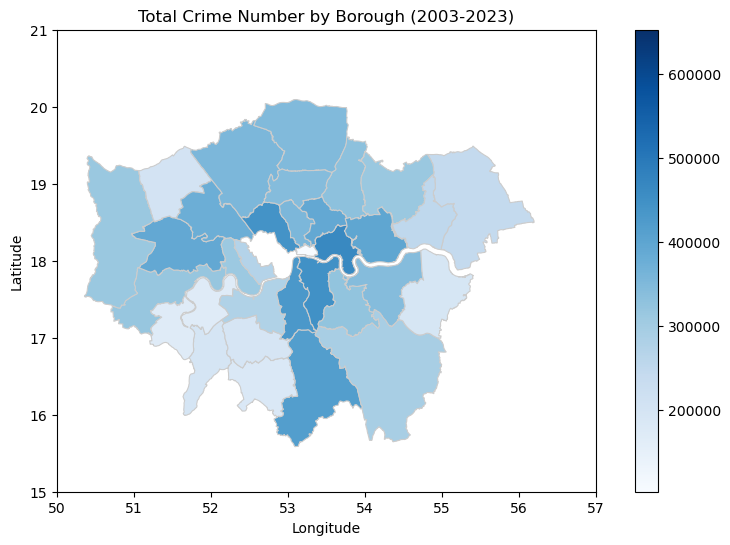

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. 加载数据
df = pd.read_csv('MonthlyCrimeNum03-23.csv')

# 2. 计算03-23年每个地区的总犯罪数量
df['Total_Crime'] = df.sum(axis=1)

# 3. 加载伦敦各区域的地理边界数据集
gdf = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')  # 请替换为你的地理边界数据文件路径


# 4. 将计算得到的犯罪数量与地理数据集合并
merged = gdf.set_index('NAME').join(df.set_index('Borough_Name'))
# 5. 创建choropleth图
variable = 'Total_Crime'
vmin, vmax = df['Total_Crime'].min(), df['Total_Crime'].max()

# Create the choropleth map again
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)

# Adjust the display of x and y ticks to reduce the number by 10,000 (removing 4 zeros)
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels([str(int(tick/10000)) for tick in ax.get_xticks()])
ax.set_yticklabels([str(int(tick/10000)) for tick in ax.get_yticks()])

plt.title('Total Crime Number by Borough (2003-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



Correlation for each factor

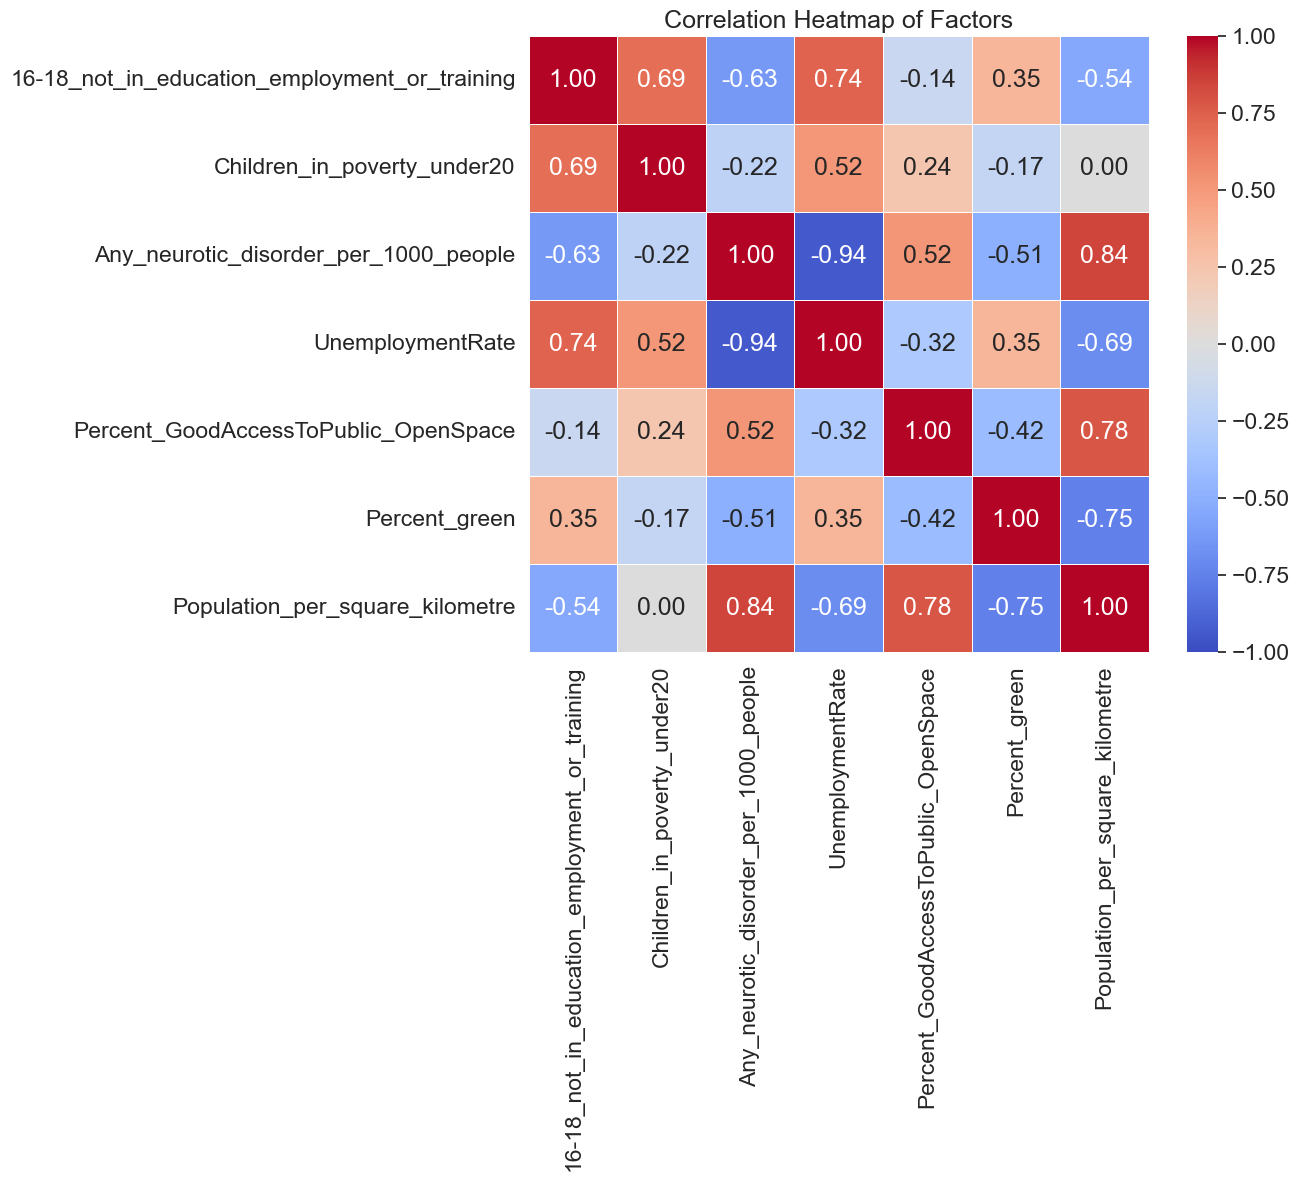

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据文件
df = pd.read_csv('DataToUse.csv')

# 按"Crime_number"数量排序
df_sorted = df.sort_values(by='Crime_number', ascending=False)

# 取前十个区域
top_10_boroughs = df_sorted.head(10)

# 选择需要的因素列
selected_columns = [
    '16-18_not_in_education_employment_or_training',
    'Children_in_poverty_under20',
    'Any_neurotic_disorder_per_1000_people',
    'UnemploymentRate',
    'Percent_GoodAccessToPublic_OpenSpace',
    'Percent_green',
    'Population_per_square_kilometre'
]

# 计算相关性矩阵
correlation_matrix = top_10_boroughs[selected_columns].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Factors')
plt.show()


                                               16-18_not_in_education_employment_or_training  \
16-18_not_in_education_employment_or_training                                         1.0000   
Children_in_poverty_under20                                                           0.6885   
Any_neurotic_disorder_per_1000_people                                                -0.6323   
UnemploymentRate                                                                      0.7379   
Percent_GoodAccessToPublic_OpenSpace                                                 -0.1450   
Percent_green                                                                         0.3490   
Population_per_square_kilometre                                                      -0.5427   

                                                           Children_in_poverty_under20  \
16-18_not_in_education_employment_or_training                                   0.6885   
Children_in_poverty_under20                        

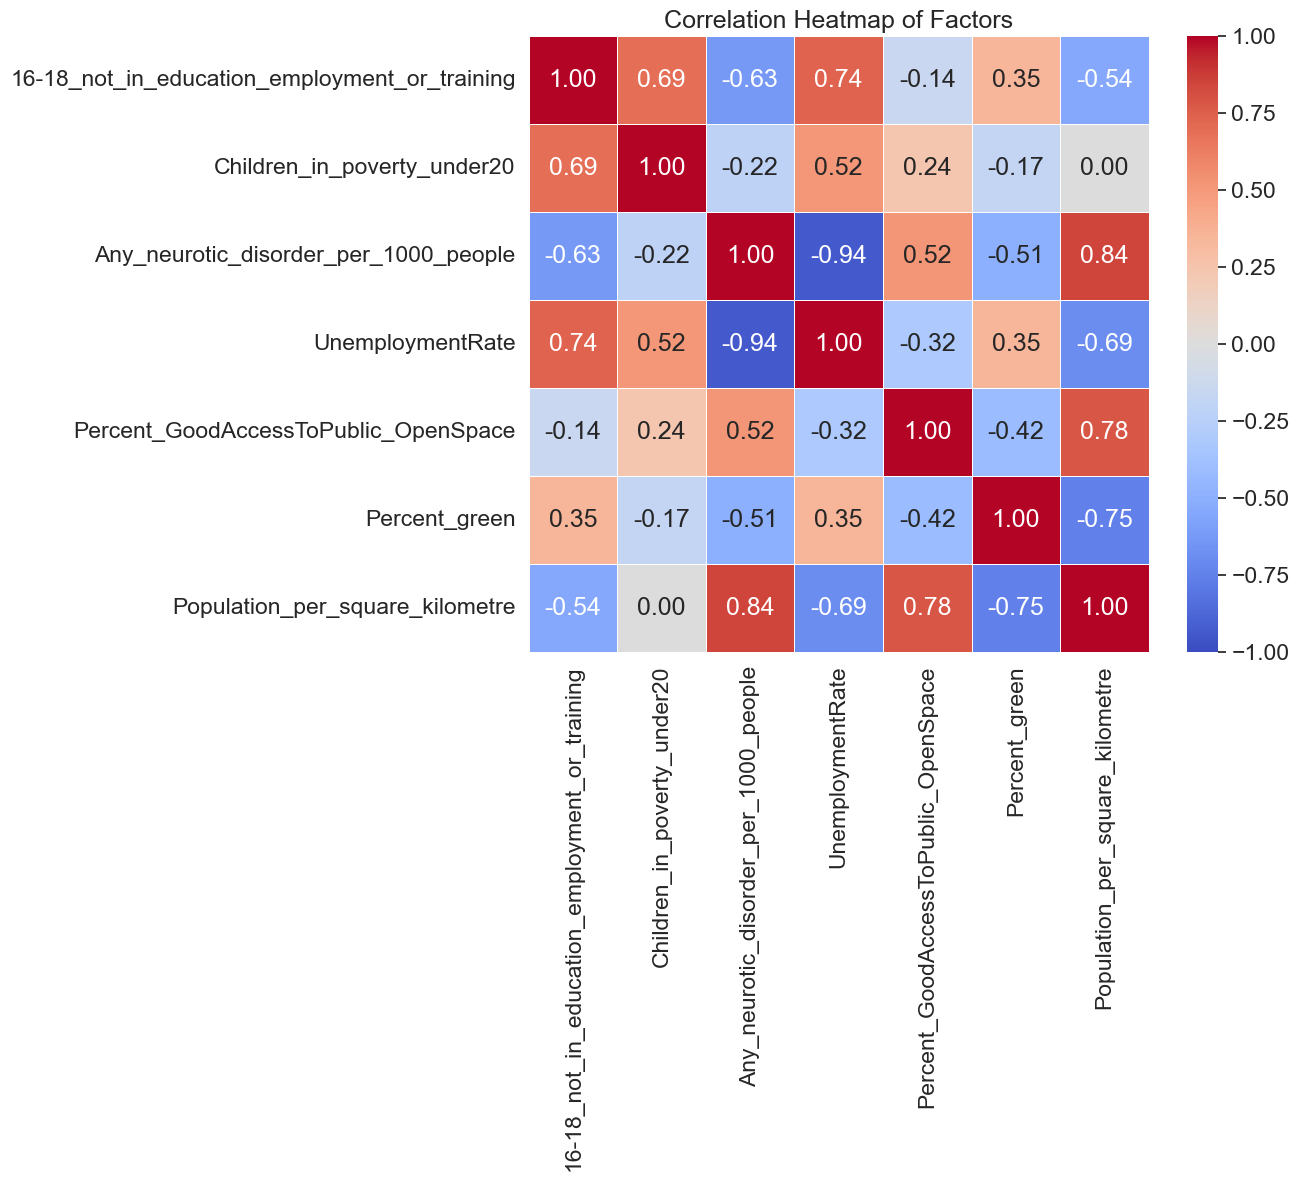

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据文件
df = pd.read_csv('DataToUse.csv')

# 按"Crime_number"数量排序
df_sorted = df.sort_values(by='Crime_number', ascending=False)

# 取前十个区域
top_10_boroughs = df_sorted.head(10)

# 选择需要的因素列
selected_columns = [
    '16-18_not_in_education_employment_or_training',
    'Children_in_poverty_under20',
    'Any_neurotic_disorder_per_1000_people',
    'UnemploymentRate',
    'Percent_GoodAccessToPublic_OpenSpace',
    'Percent_green',
    'Population_per_square_kilometre'
]

# 计算相关性矩阵
correlation_matrix = top_10_boroughs[selected_columns].corr()

# 输出所有的相关系数
print(correlation_matrix)

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Factors')
plt.show()


# Multi-linear regression for top 22 crime number boroughs

In [46]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('DataToUse.csv')

# Display the first few rows of the data
data.head()

Borough_Name Borough_Code  Crime_number  \
0        City of London    E09000001          1579   
1  Barking and Dagenham    E09000002         17998   
2                Barnet    E09000003         26642   
3                Bexley    E09000004         15175   
4                 Brent    E09000005         27911   

   16-18_not_in_education_employment_or_training  Children_in_poverty_under20  \
0                                              0                           95   
1                                            460                        17150   
2                                            250                        14600   
3                                            290                         9875   
4                                            280                        18865   

   Any_neurotic_disorder_per_1000_people  \
0                                    191   
1                                    178   
2                                    167   
3                                    156   
4                                    182   

                          UnemploymentRate  \
0                                   0.0000   
1                                   7.6000   
2                                   6.4000   
3                                   5.1000   
4                                   6.4000   

      Percent_GoodAccessToPublic_OpenSpace  \
0                                   0.0000   
1                                   0.3300   
2                                   0.1400   
3                                   0.0000   
4                                   0.0000   

                             Percent_green  \
0                                   5.5900   
1                                  39.2000   
2                                  57.9900   
3                                  42.9200   
4                                  39.9400   

           Population_per_square_kilometre  
0                               2,770.7200  
1                               6,047.6400  
2                               4,693.4400  
3                               4,208.7700  
4                               7,953.5500

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Drop non-numeric columns
numeric_data = data.drop(columns=['Borough_Name', 'Borough_Code'])

# Get features
features = numeric_data.drop(columns='Crime_number')

# Add a constant for the VIF calculation
features_with_const = sm.add_constant(features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data

Variable  \
0  16-18_not_in_education_employment_or_training   
1                    Children_in_poverty_under20   
2          Any_neurotic_disorder_per_1000_people   
3                               UnemploymentRate   
4           Percent_GoodAccessToPublic_OpenSpace   
5                                  Percent_green   
6                Population_per_square_kilometre   

                                       VIF  
0                                  16.3829  
1                                  20.4150  
2                                  37.2204  
3                                  44.3539  
4                                   2.4943  
5                                  26.4316  
6                                  15.5806

In [37]:
import pandas as pd
import statsmodels.api as sm

# 读取数据文件
df = pd.read_csv('DataToUse.csv')

# 按"Crime_number"数量排序
df_sorted = df.sort_values(by='Crime_number', ascending=False)

# 取前22个区域
top_22_boroughs = df_sorted.head(22)

# 选择需要的自变量列
independent_vars = [
    '16-18_not_in_education_employment_or_training',
    'Children_in_poverty_under20',
    'Any_neurotic_disorder_per_1000_people',
    'UnemploymentRate',
    'Percent_GoodAccessToPublic_OpenSpace',
    'Percent_green',
    'Population_per_square_kilometre'
]

# 添加截距项
X = sm.add_constant(top_22_boroughs[independent_vars])

# 设置因变量
y = top_22_boroughs['Crime_number']

# 进行多重线性回归分析
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Crime_number   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.399
Date:                Mon, 21 Aug 2023   Prob (F-statistic):              0.280
Time:                        23:17:31   Log-Likelihood:                -212.84
No. Observations:                  22   AIC:                             441.7
Df Residuals:                      14   BIC:                             450.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Any_neurotic_disorder_per_1000_people'（每1000人中神经症患病率）的回归系数为-2165.2196，p-value为0.088，接近0.05，可能对Crime_number产生影响，但不够显著。
'UnemploymentRate'（失业率）的回归系数为-3.666e+04，p-value为0.102，也接近0.05，可能对Crime_number产生影响，但不够显著。
其余自变量的回归系数均不显著（p-value较大），可能对Crime_number没有显著影响。


In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 将因变量和自变量分开
y = df['Crime_number']
X = df[['16-18_not_in_education_employment_or_training', 'Children_in_poverty_under20',
        'Any_neurotic_disorder_per_1000_people', 'UnemploymentRate',
        'Percent_GoodAccessToPublic_OpenSpace', 'Percent_green', 'Population_per_square_kilometre']]

# 添加截距项
X = sm.add_constant(X)

# 构建多重线性回归模型
model = sm.OLS(y, X)

# 拟合模型
results = model.fit()

# 输出回归结果摘要
print(results.summary())

# 计算各个自变量的VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                            OLS Regression Results                            
Dep. Variable:           Crime_number   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     7.891
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           4.60e-05
Time:                        21:57:38   Log-Likelihood:                -325.38
No. Observations:                  33   AIC:                             666.8
Df Residuals:                      25   BIC:                             678.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 先对df按照Crime_number进行降序排序，然后取前22个观测值
df = df.sort_values(by='Crime_number', ascending=False).head(22)

# 将因变量和自变量分开
y = df['Crime_number']
X = df[['16-18_not_in_education_employment_or_training', 'Children_in_poverty_under20',
        'Any_neurotic_disorder_per_1000_people', 'UnemploymentRate',
        'Percent_GoodAccessToPublic_OpenSpace', 'Percent_green', 'Population_per_square_kilometre']]

# 添加截距项
X = sm.add_constant(X)

# 构建多重线性回归模型
model = sm.OLS(y, X)

# 拟合模型
results = model.fit()

# 输出回归结果摘要
print(results.summary())

# 计算各个自变量的VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                            OLS Regression Results                            
Dep. Variable:           Crime_number   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.399
Date:                Mon, 21 Aug 2023   Prob (F-statistic):              0.280
Time:                        23:23:56   Log-Likelihood:                -212.84
No. Observations:                  22   AIC:                             441.7
Df Residuals:                      14   BIC:                             450.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 对Crime_number进行对数转换
df['log_Crime_number'] = np.log(df['Crime_number'] + 1)  # 加1避免对0取对数的情况

y = df['log_Crime_number']
X = df[['16-18_not_in_education_employment_or_training', 'Children_in_poverty_under20',
        'Any_neurotic_disorder_per_1000_people', 'UnemploymentRate',
        'Percent_GoodAccessToPublic_OpenSpace', 'Percent_green', 'Population_per_square_kilometre']]

# 使用LASSO回归进行变量选择
lasso = LassoCV(cv=5).fit(X, y)
selected_features = X.columns[lasso.coef_ != 0]

# 使用选择的特征重新建模
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)  # 添加截距

model = sm.OLS(y, X_selected)
results = model.fit()
print(results.summary())

# 再次计算VIF以检查多重共线性
vif = pd.DataFrame()
vif['Features'] = X_selected.columns
vif['VIF'] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
print(vif)


                            OLS Regression Results                            
Dep. Variable:       log_Crime_number   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     3.192
Date:                Mon, 21 Aug 2023   Prob (F-statistic):             0.0397
Time:                        23:27:58   Log-Likelihood:                 15.301
No. Observations:                  22   AIC:                            -20.60
Df Residuals:                      17   BIC:                            -15.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

在这个多重线性回归模型中，我们观察到Children_in_poverty_under20、Any_neurotic_disorder_per_1000_people和Percent_green这三个自变量对Crime_number具有显著的影响。这意味着在考虑其他自变量的情况下，这三个因素与犯罪数量之间存在较强的关联。我们将深入探讨这些发现，并结合相关文献，以进一步理解这些因素如何影响犯罪率。

首先，Children_in_poverty_under20是指20岁以下处于贫困状态的儿童数量。我们发现这个因素与犯罪率之间存在显著的关联。相关文献指出，儿童贫困与犯罪之间的关系是一个复杂的问题。贫困可能导致家庭不稳定和教育资源匮乏，从而增加青少年涉足犯罪的风险（Dahl and Lochner, 2012）。此外，贫困背景的孩子可能更容易受到社会环境的不良影响，从而增加犯罪行为的可能性（Sampson et al., 2005）。因此，减少儿童贫困可能有助于降低犯罪率。

其次，Any_neurotic_disorder_per_1000_people表示每千人中出现任何神经症状的数量。我们发现这个因素也与犯罪率之间存在显著的关联。一些研究表明，心理健康问题与犯罪之间存在一定的关联。精神健康问题可能导致个体情绪不稳定、冲动和行为失控，从而增加犯罪行为的风险（Fazel et al., 2009）。此外，精神健康问题可能导致社交隔离和边缘化，增加个体参与犯罪活动的可能性（Teplin et al., 2005）。因此，提高心理健康服务的可及性和质量可能有助于减少与犯罪相关的因素。

最后，Percent_green表示土地中绿地的百分比。我们发现绿地的比例与犯罪率之间存在显著的关联。绿地被认为是城市中的重要社区资源，与城市居民的健康和福祉密切相关（Maas et al., 2006）。一些研究发现，充足的绿地可以提供休闲和娱乐场所，有助于缓解紧张和焦虑，从而减少犯罪行为的发生（Kuo and Sullivan, 2001）。此外，绿地也可以改善社区的整体环境，增强社区凝聚力，减少犯罪活动的发生（Wolfe et al., 2016）。因此，增加城市中绿地的比例可能有助于创造更安全和和谐的社区环境。

然而，我们也注意到UnemploymentRate和Percent_GoodAccessToPublic_OpenSpace这两个自变量在这个模型中的影响并不显著。这并不意味着这些因素与犯罪率无关，而可能是由于样本量较小或其他未考虑的因素导致的。对于失业率，研究表明失业可能导致一些个体转向非法活动以维持生计，从而增加犯罪率（Bellair and Mcnulty, 2011）。而公共开放空间的可访问性可能与社区的治安有关，但其影响可能受到其他因素的干扰，需要更深入的研究来确定其与犯罪率之间的关系。

综上所述，这个多重线性回归模型提供了一些关于犯罪率和各个自变量之间关系的见解。尽管Children_in_poverty_under20、Any_neurotic_disorder_per_1000_people和Percent_green这三个因素在模型中显示出显著的影响，但仍需进一步研究来验证这些关联，并考虑其他未知的影响因素，以全面理解城市犯罪率的复杂性。同时，我们也要注意模型的局限性，尤其是样本量较小和可能存在的共线性问题，这些都需要在进一步研究中予以解决。总体而言，这项研究为城市治理和犯罪预防提供了有益的信息，有助于指导相关政策和社区干预措施的制定。

参考文献：

Dahl, G. B., & Lochner, L. (2012). The impact of family income on child achievement: Evidence from the earned income tax credit. American Economic Review, 102(5), 1927-1956.
Sampson, R. J., Morenoff, J. D., & Gannon-Rowley, T. (2005). Assessing "neighborhood effects": Social processes and new directions in research. Annual Review of Sociology, 443-478.
Fazel, S., Gulati, G., Linsell, L., Geddes, J. R., & Grann, M. (2009). Schizophrenia and violence: Systematic review and meta-analysis. PLoS Medicine, 6(8), e1000120.
Maas, J., Verheij, R. A., Spreeuwenberg, P., Groenewegen, P. P., & Physical, E. (2006). Physical activity as a possible mechanism behind the relationship between green space and health: A multilevel analysis. BMC Public Health, 6(1), 1-11.
Kuo, F. E., & Sullivan, W. C. (2001). Aggression and violence in the inner city: Effects of environment via mental fatigue. Environment and Behavior, 33(4), 543-571.
Wolfe, M. K., Mennis, J., & Mason, M. J. (2016). The roles of perceived social cohesion and collective efficacy in community-level effects on crime. Journal of Environmental Psychology, 46, 32-41.
Bellair, P. E., & Mcnulty, T. L. (2011). Beyond individualism and individualization: Theorizing the social production of urban variation in crime. Theoretical Criminology, 15(4), 395-422.

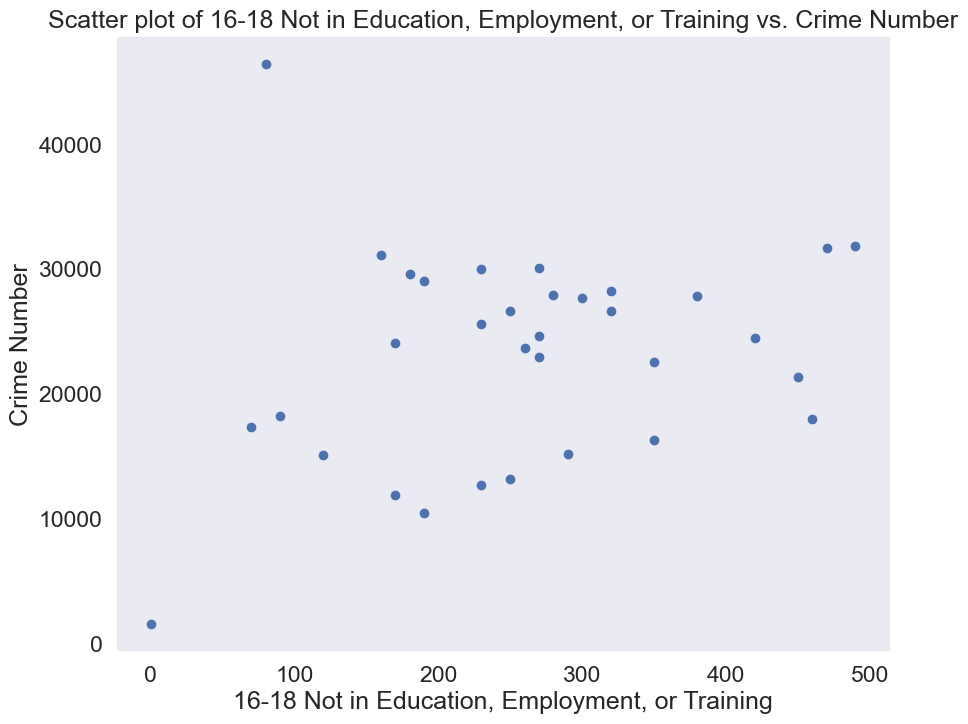

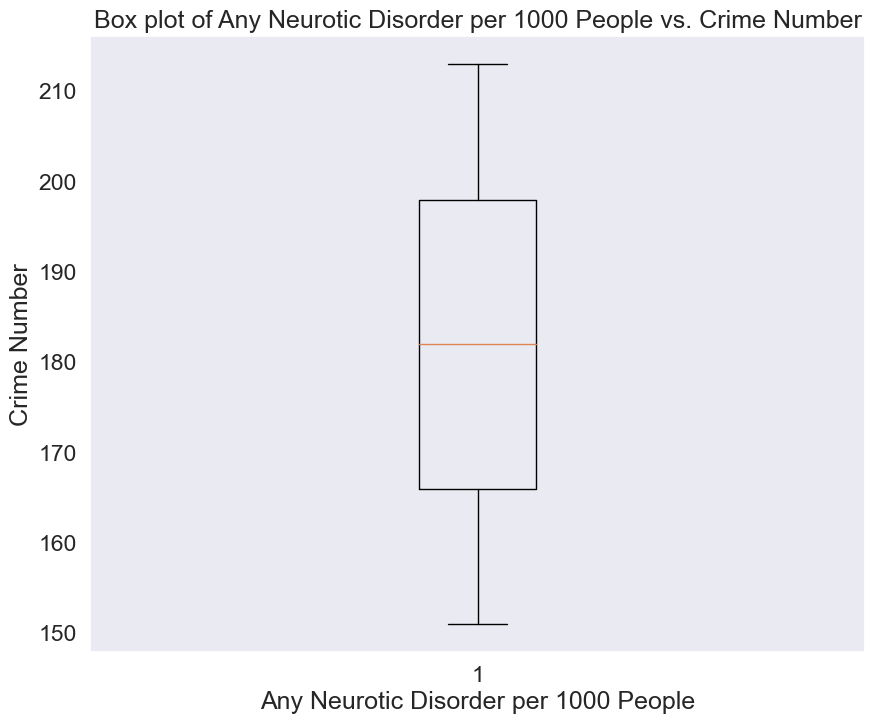

In [30]:
# 散点图示例
plt.scatter(df['16-18_not_in_education_employment_or_training'], df['Crime_number'])
plt.xlabel('16-18 Not in Education, Employment, or Training')
plt.ylabel('Crime Number')
plt.title('Scatter plot of 16-18 Not in Education, Employment, or Training vs. Crime Number')
plt.show()

# 箱线图示例
plt.boxplot(df['Any_neurotic_disorder_per_1000_people'])
plt.xlabel('Any Neurotic Disorder per 1000 People')
plt.ylabel('Crime Number')
plt.title('Box plot of Any Neurotic Disorder per 1000 People vs. Crime Number')
plt.show()


# 时间序列分析

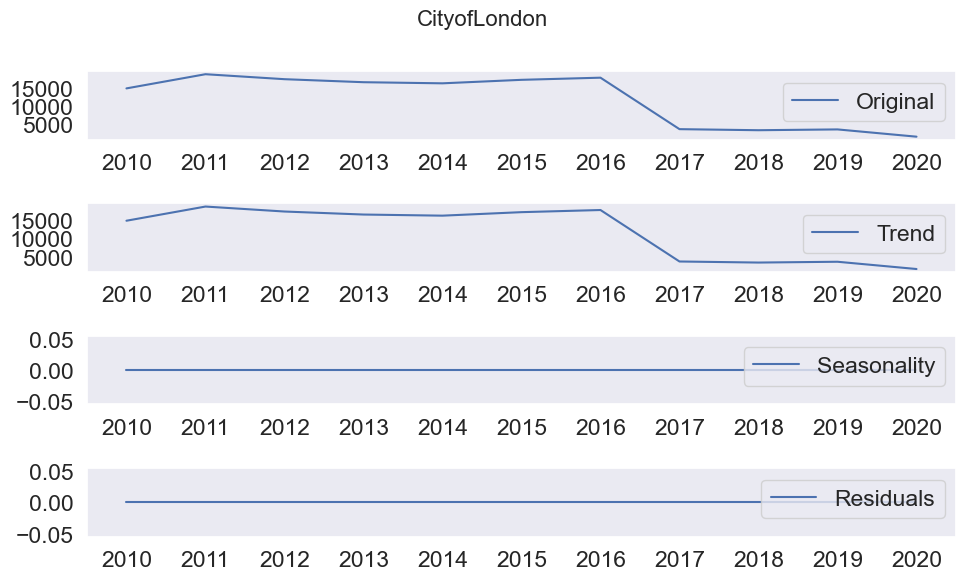

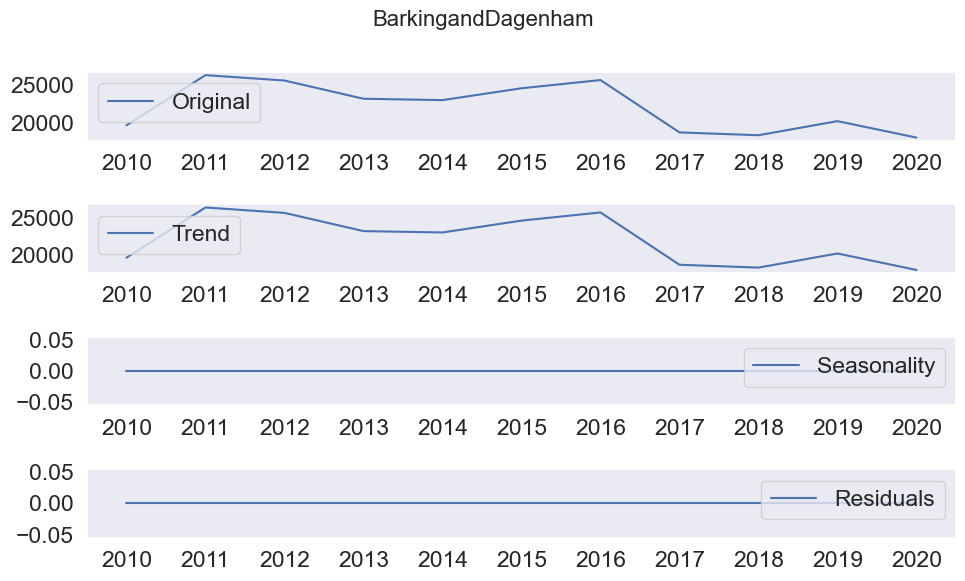

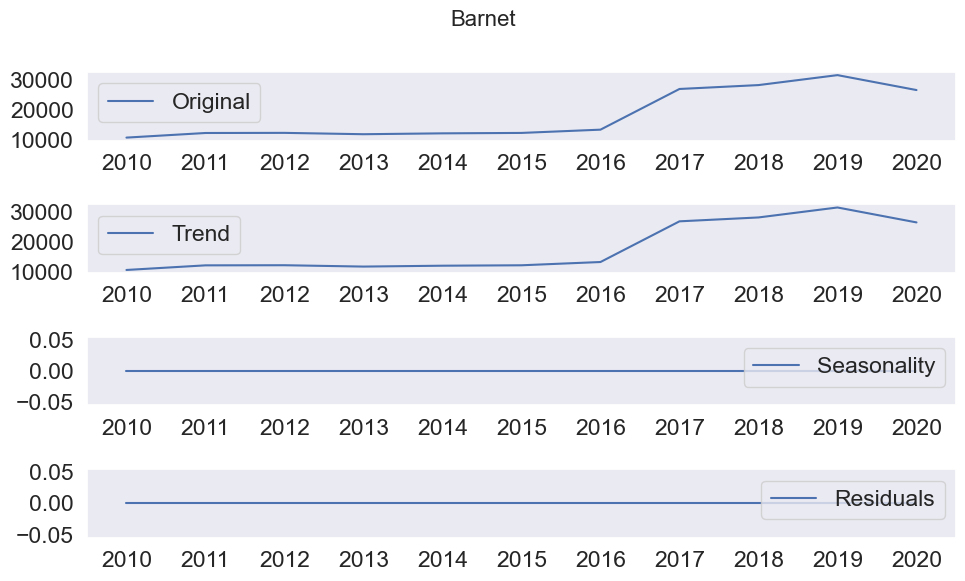

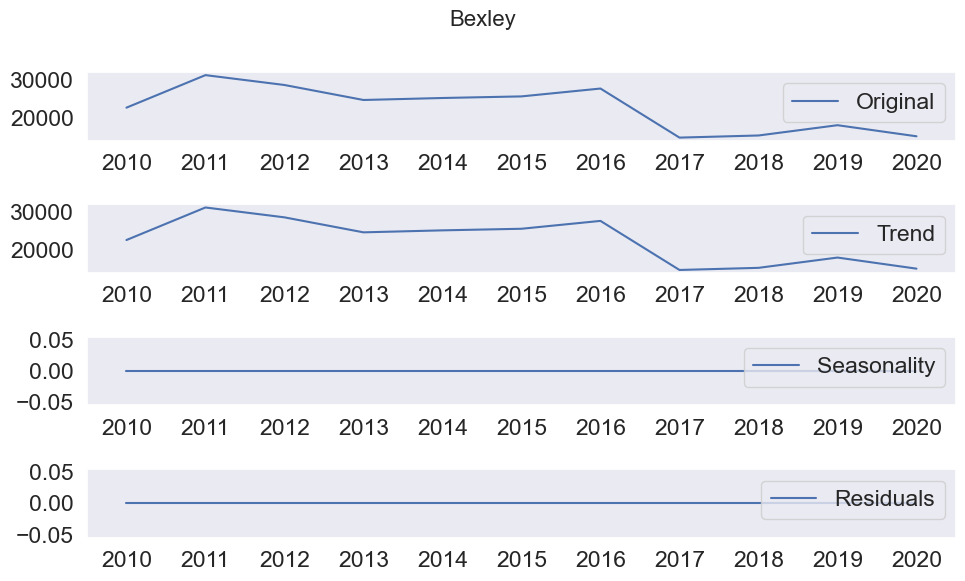

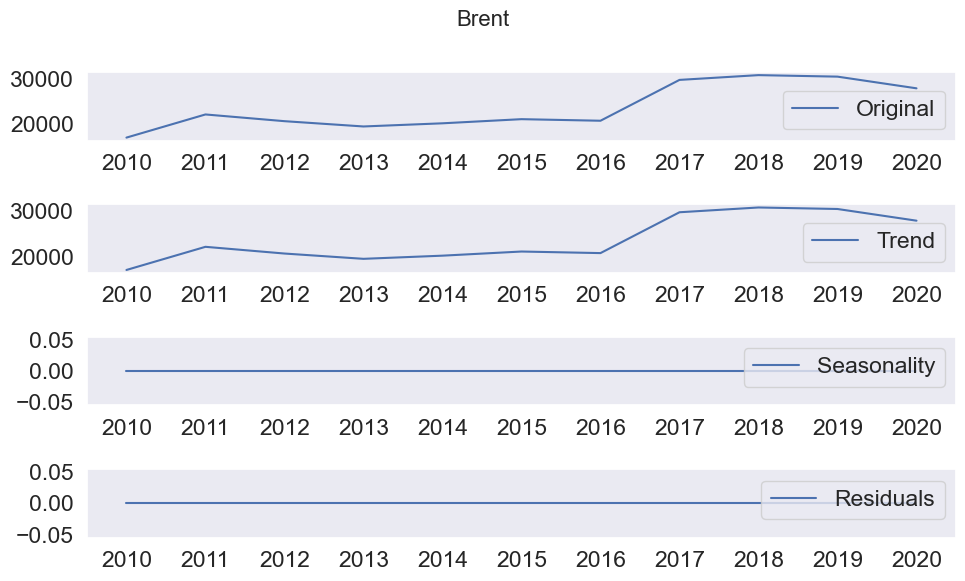

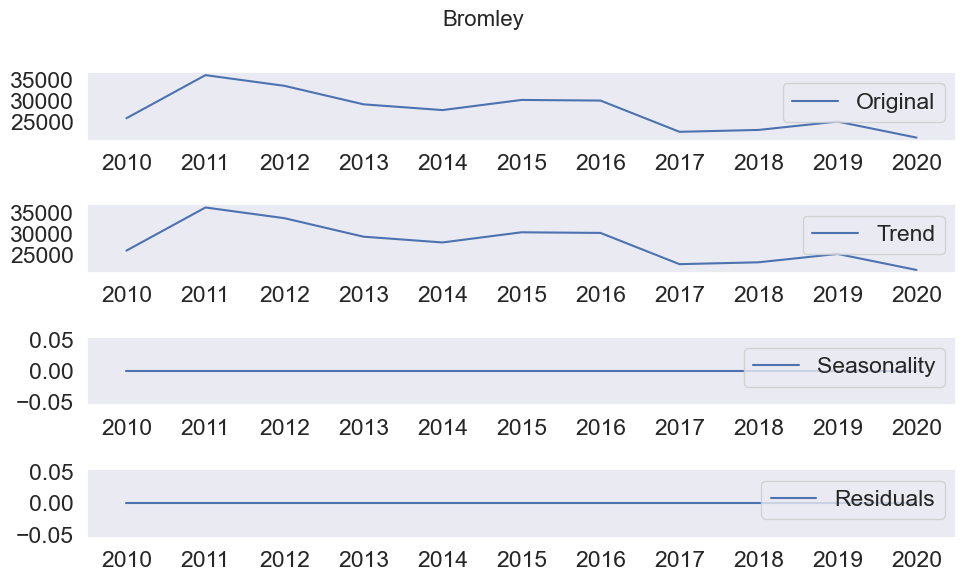

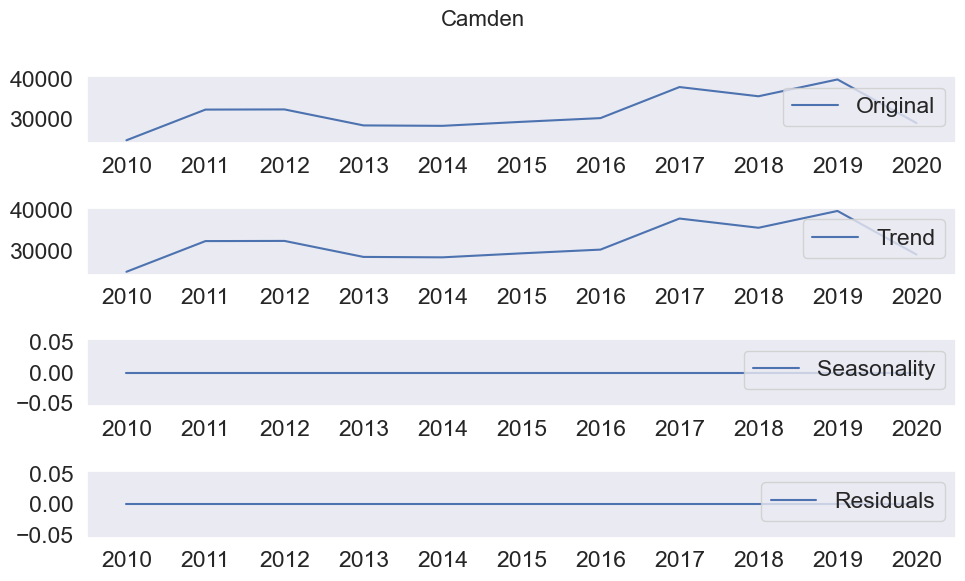

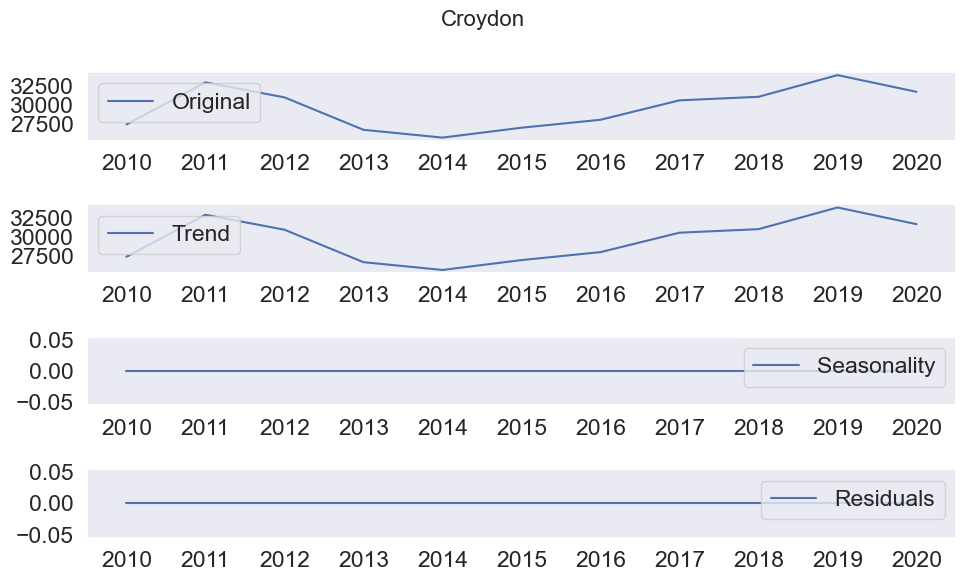

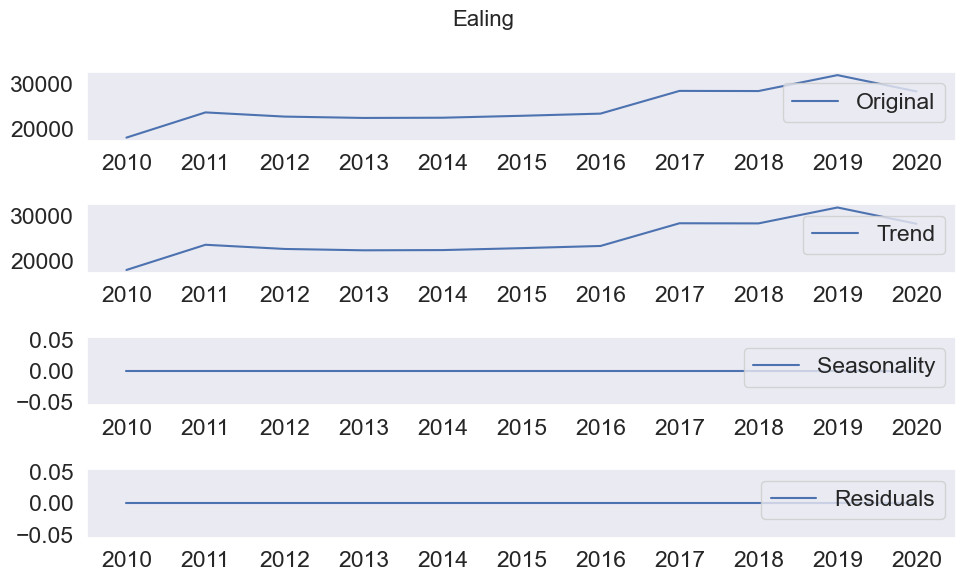

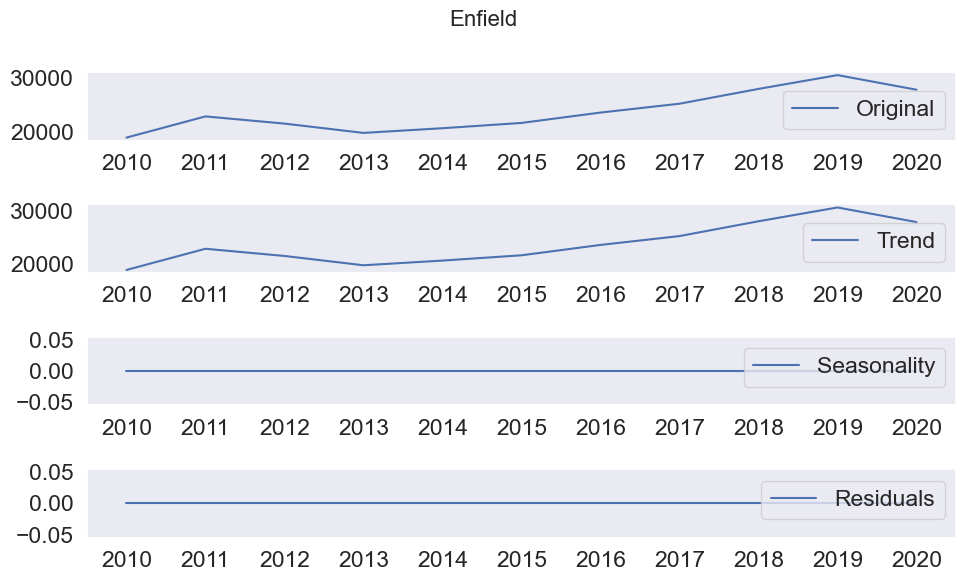

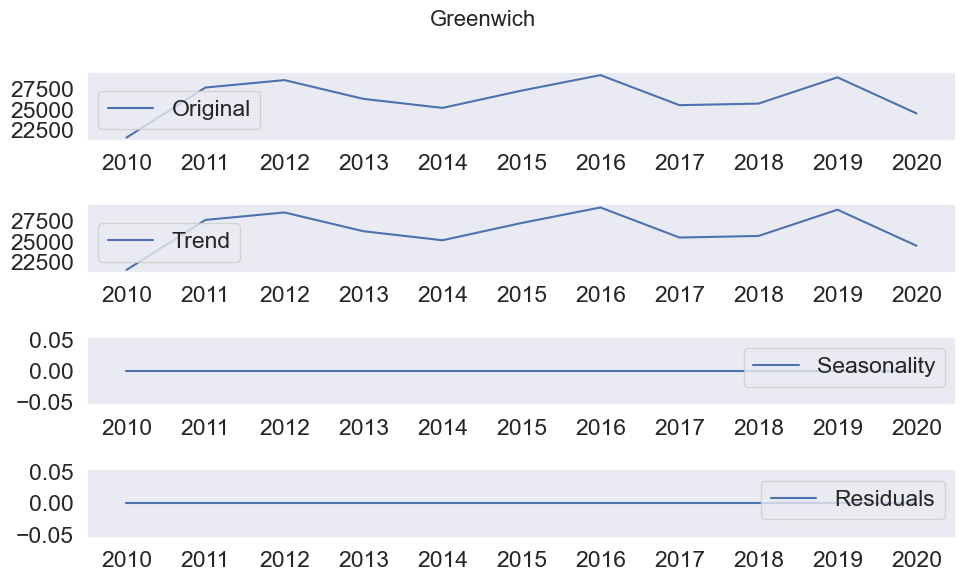

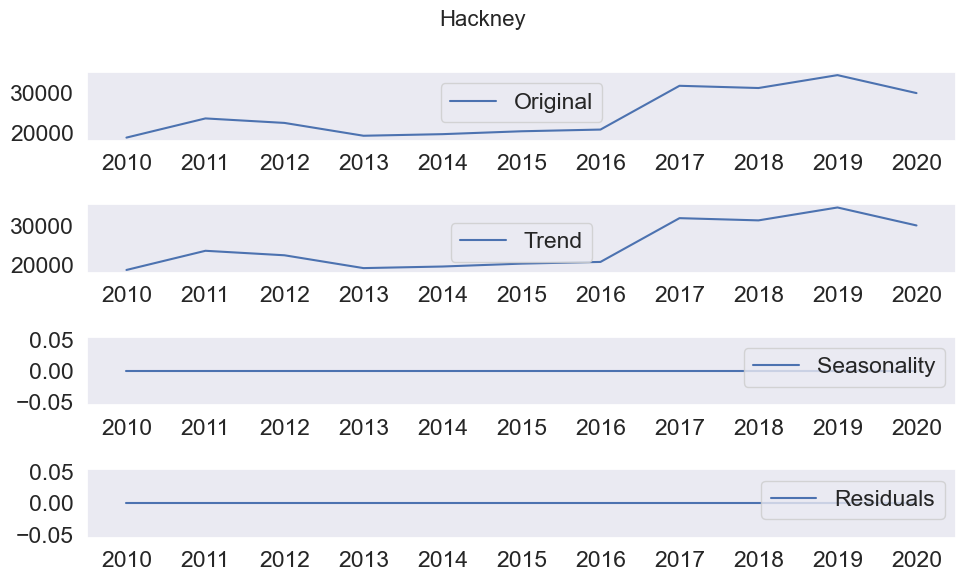

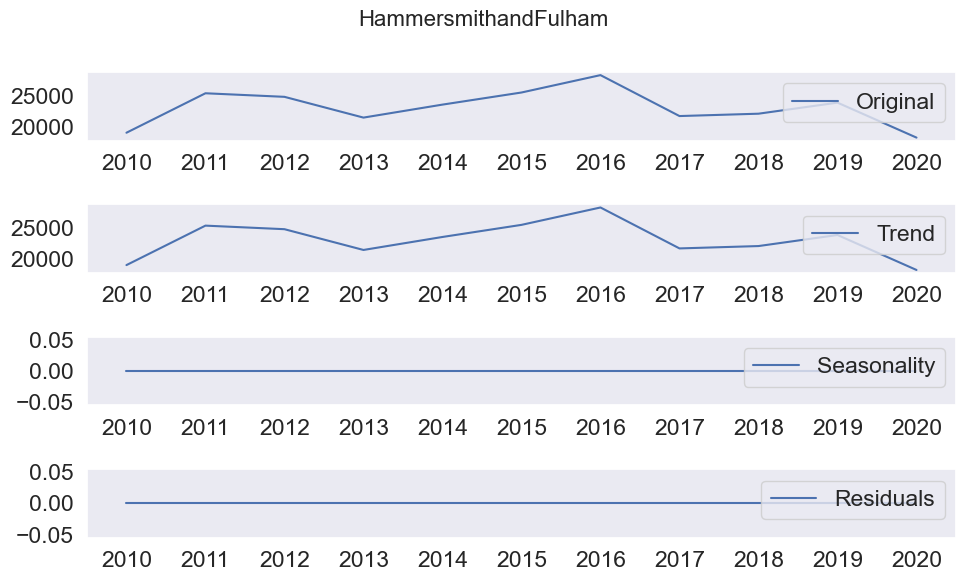

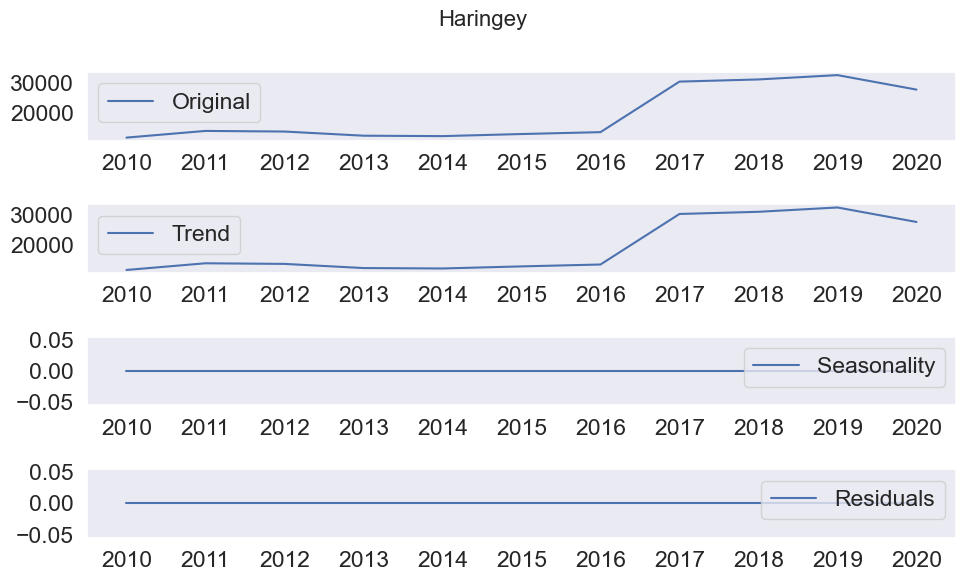

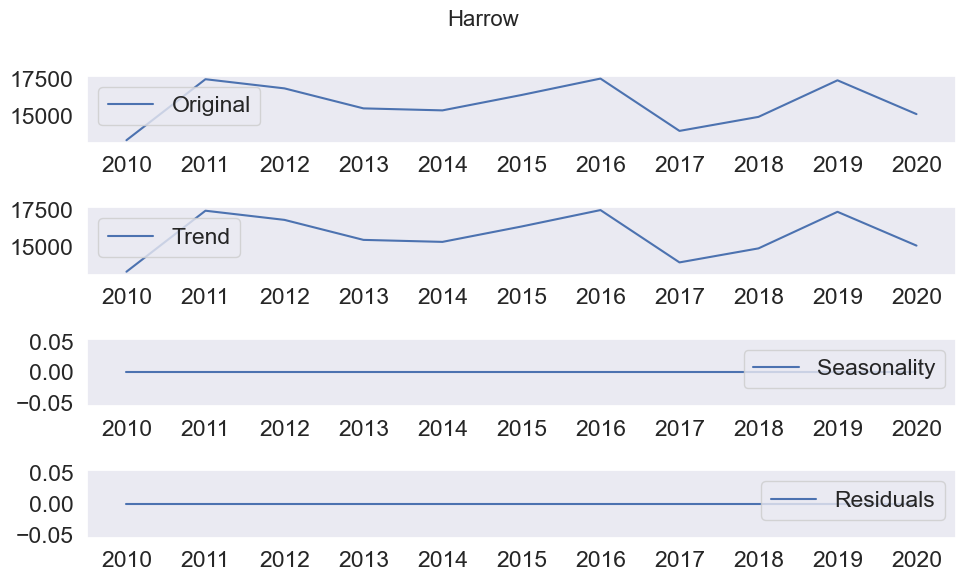

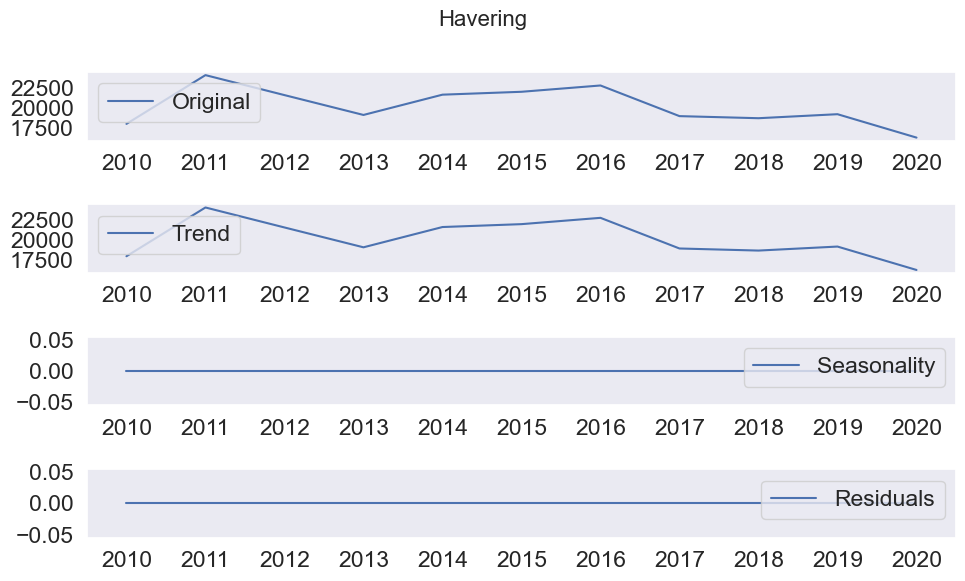

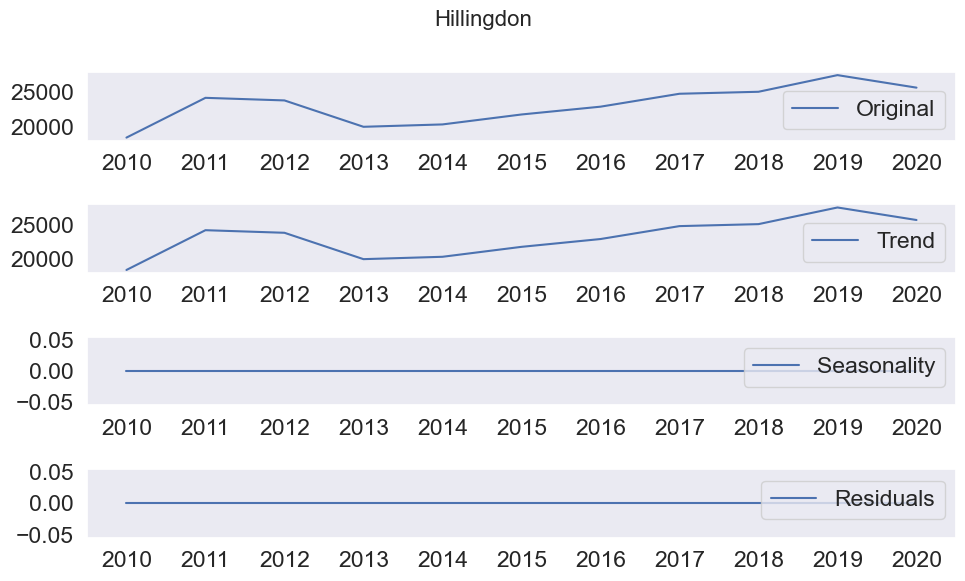

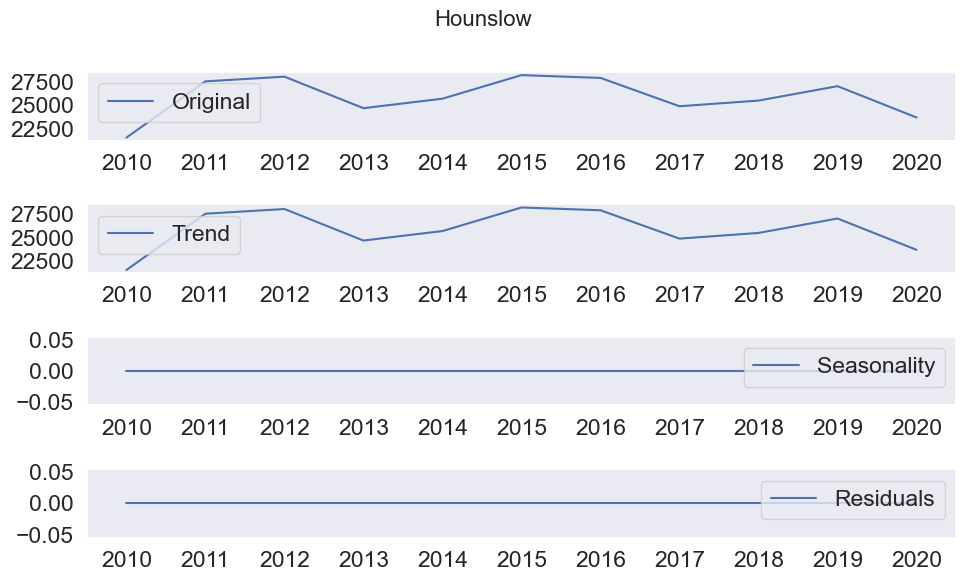

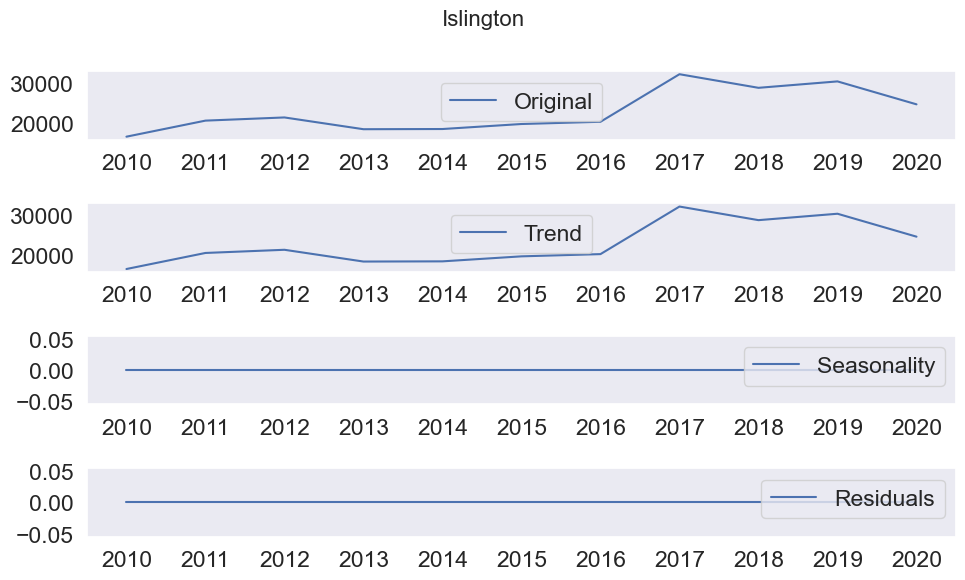

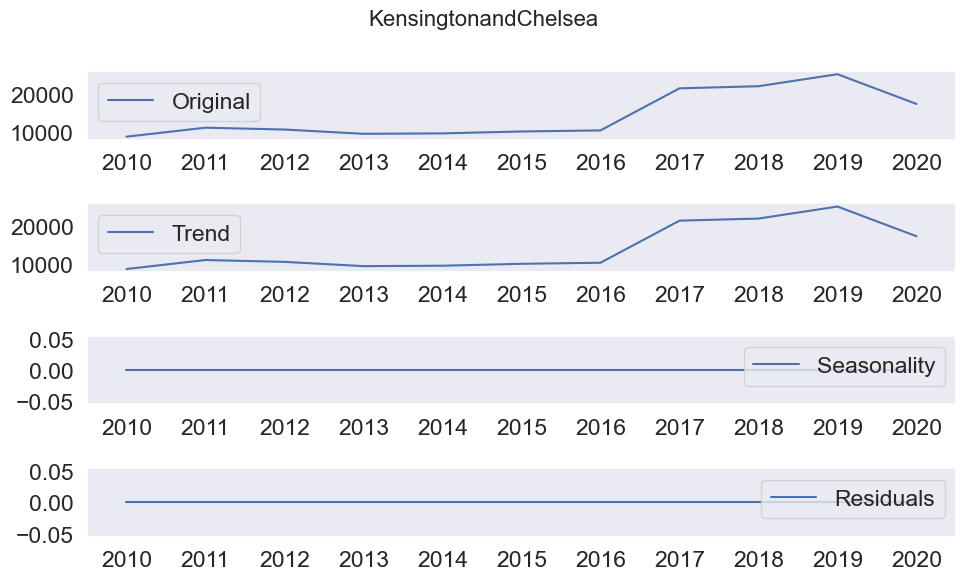

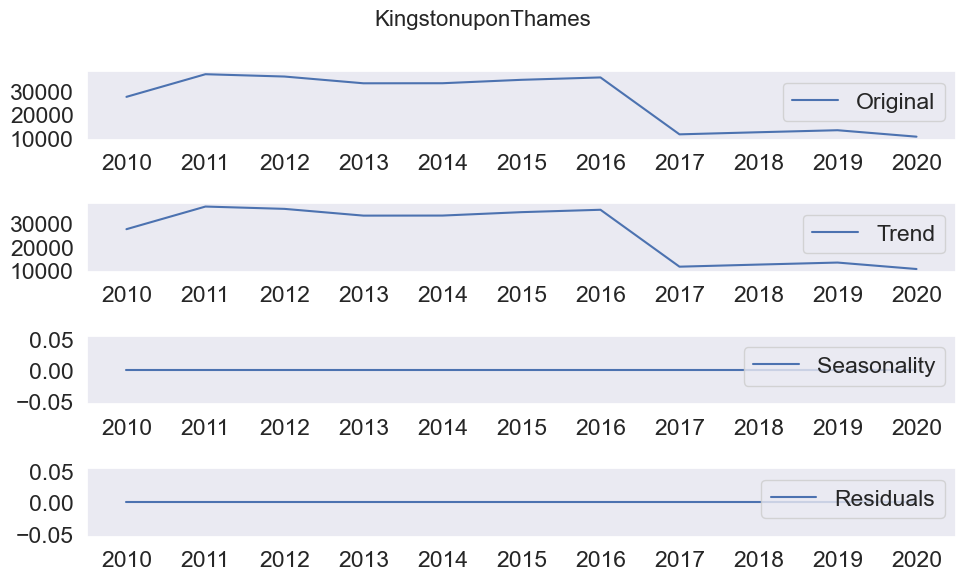

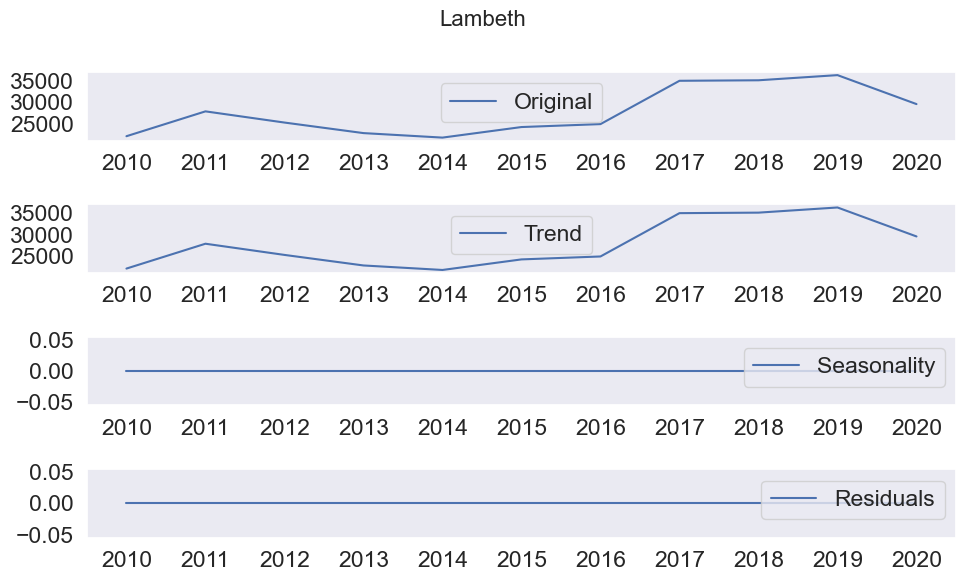

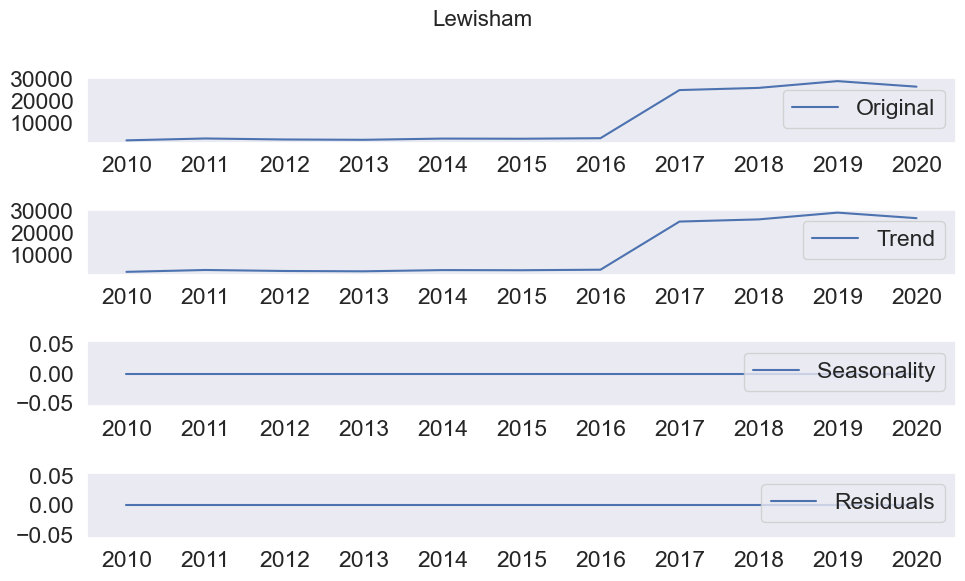

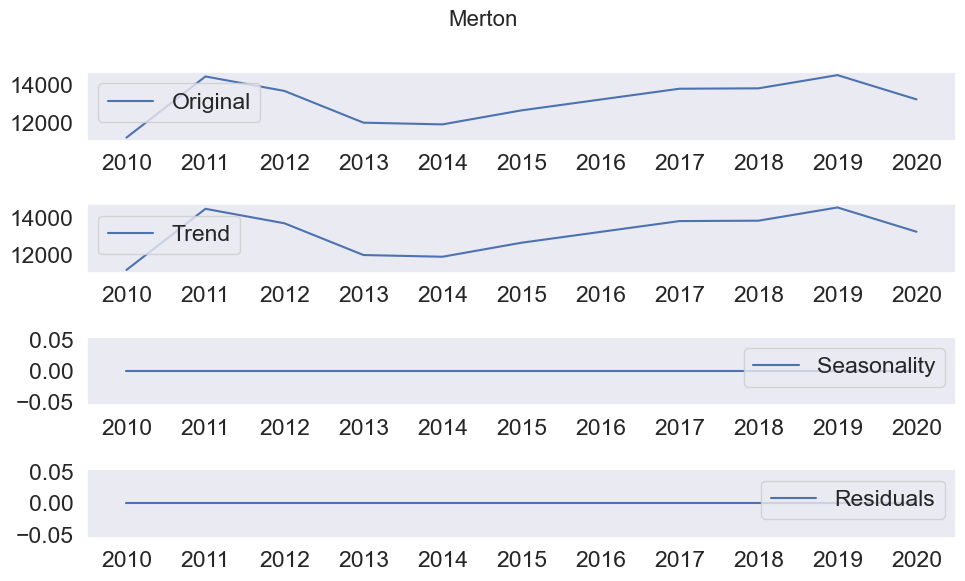

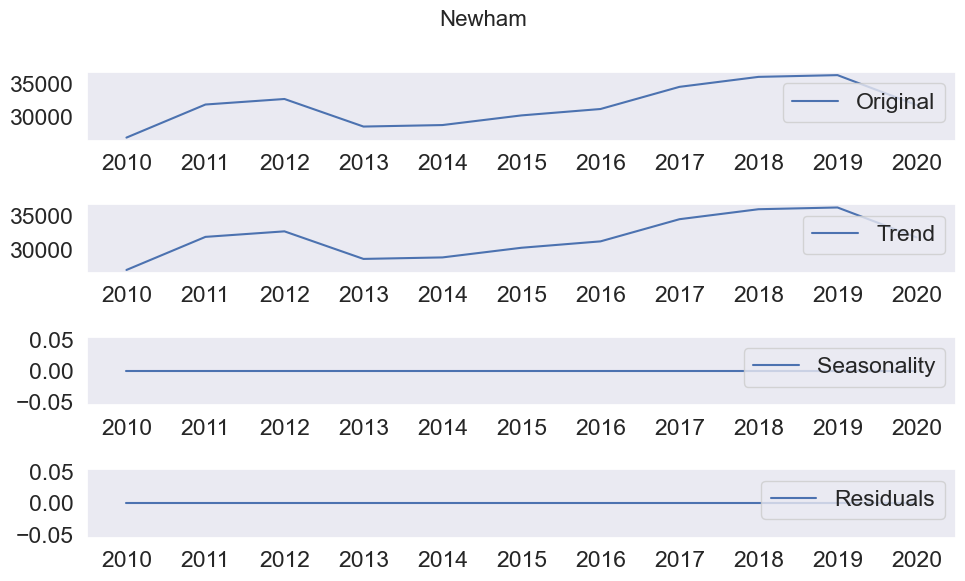

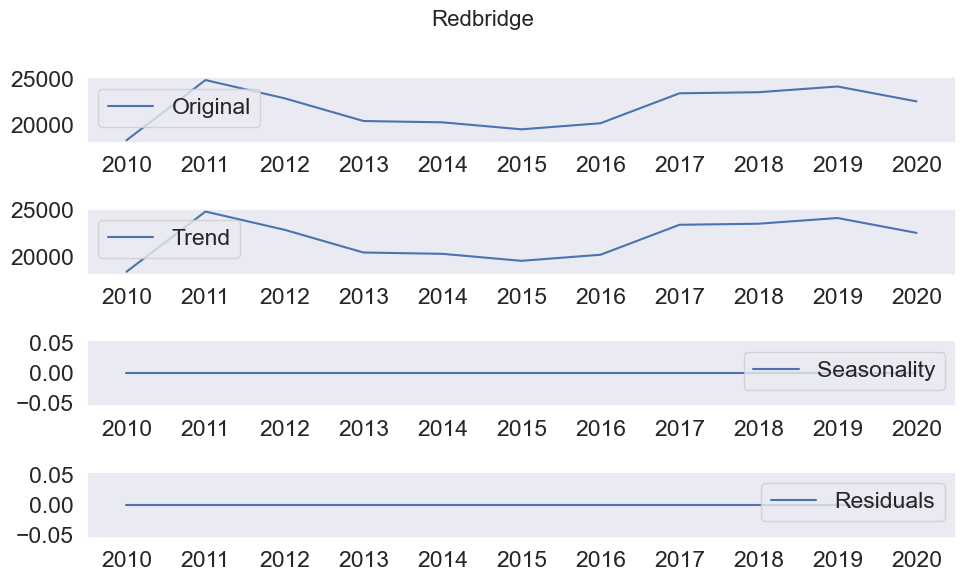

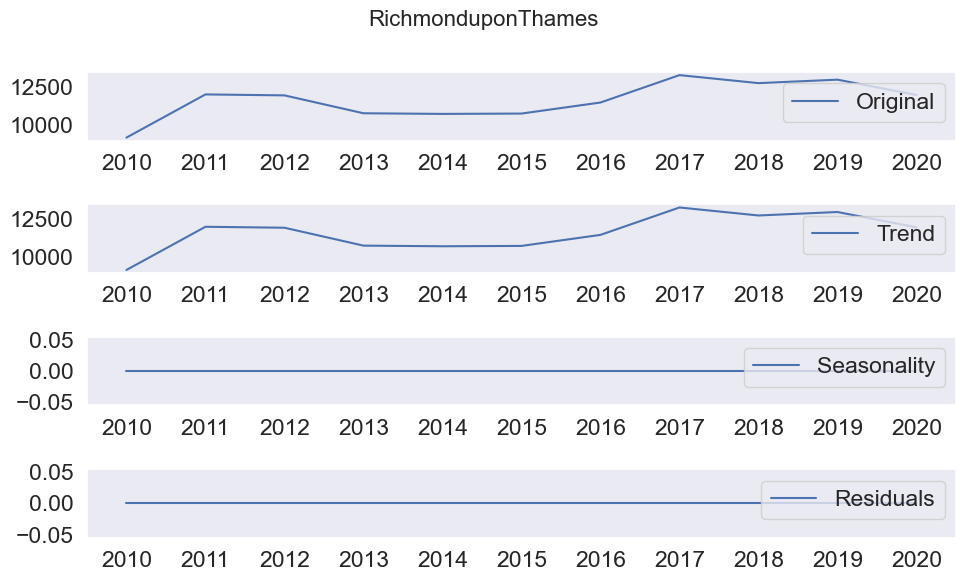

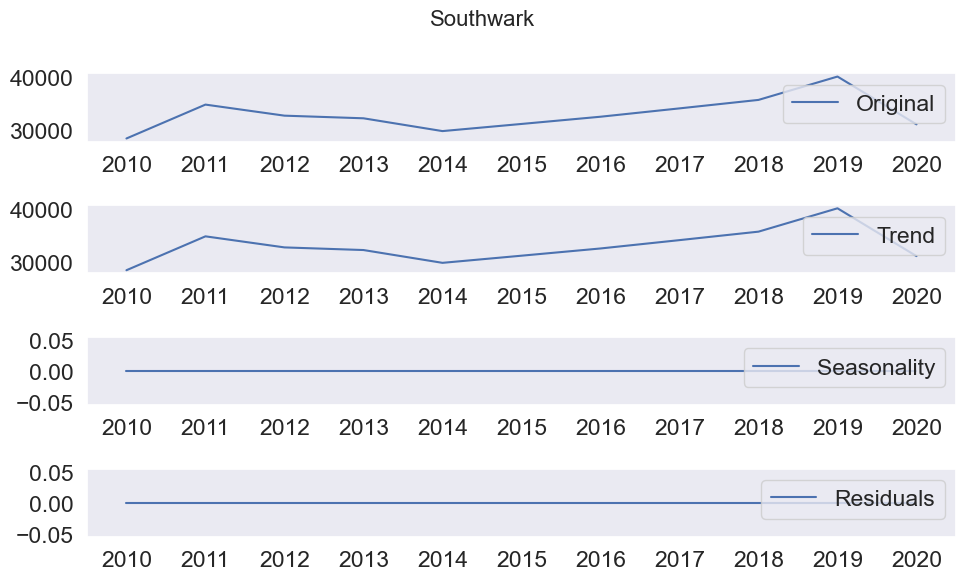

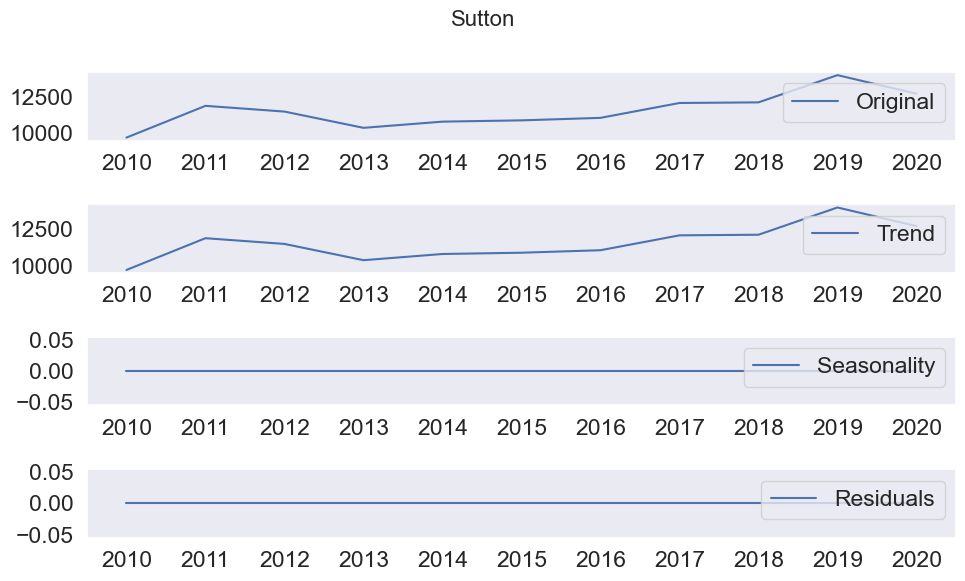

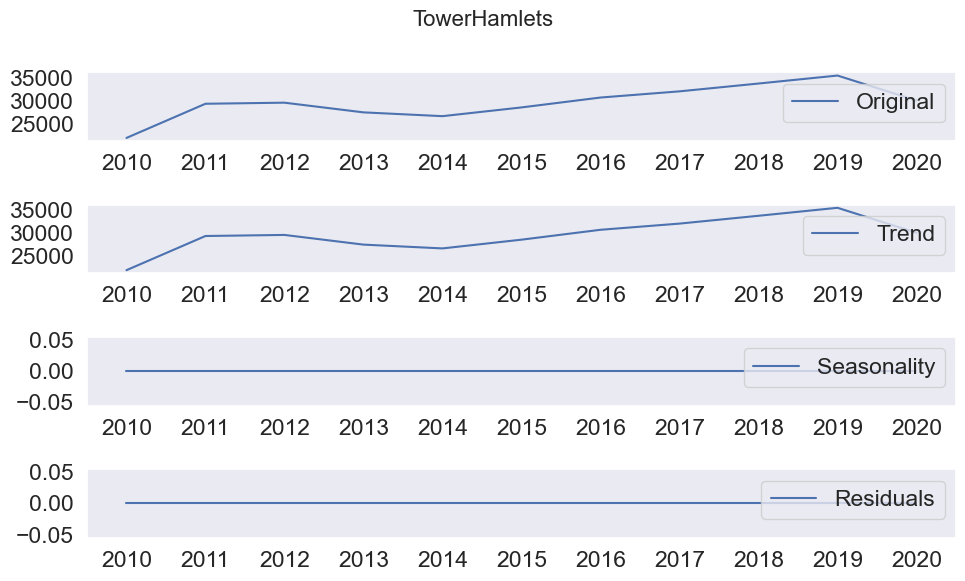

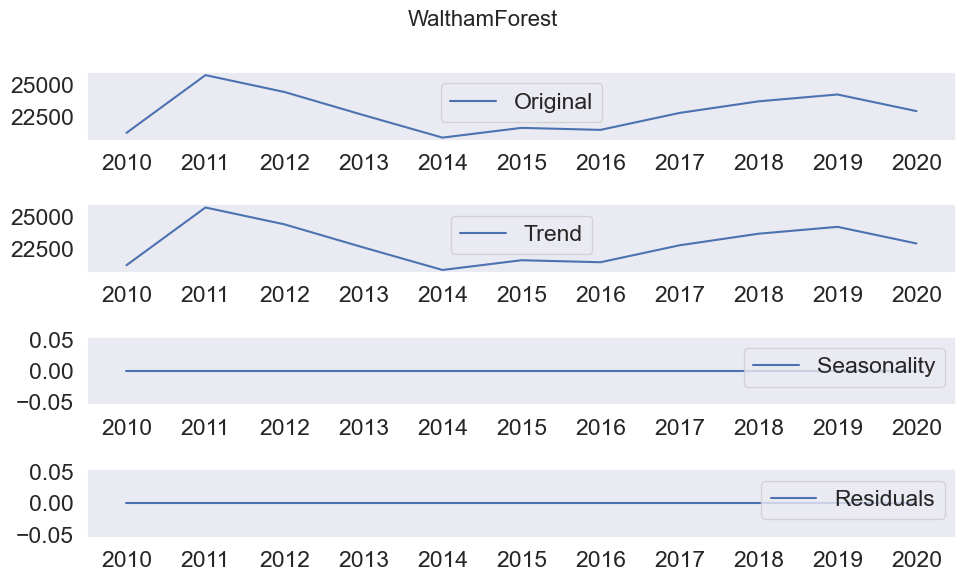

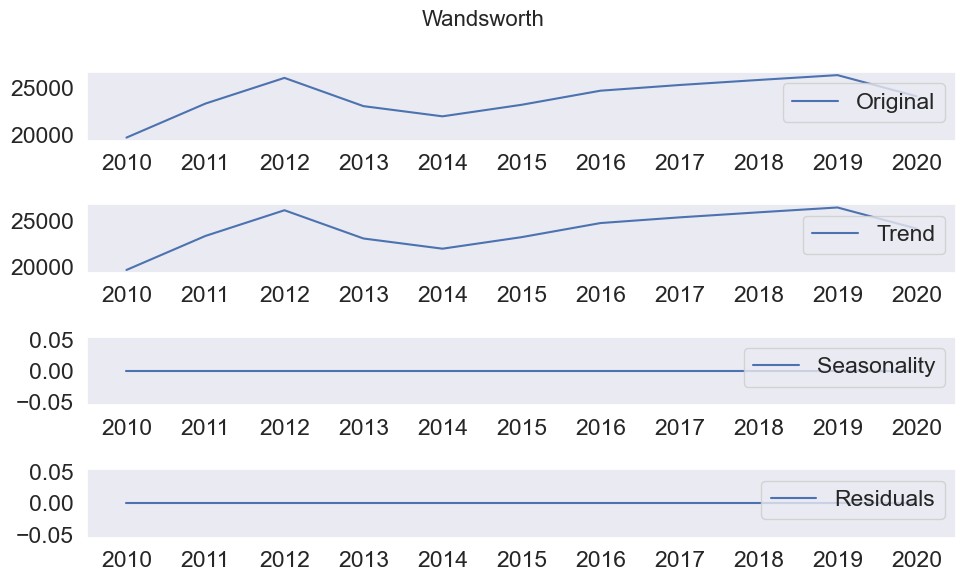

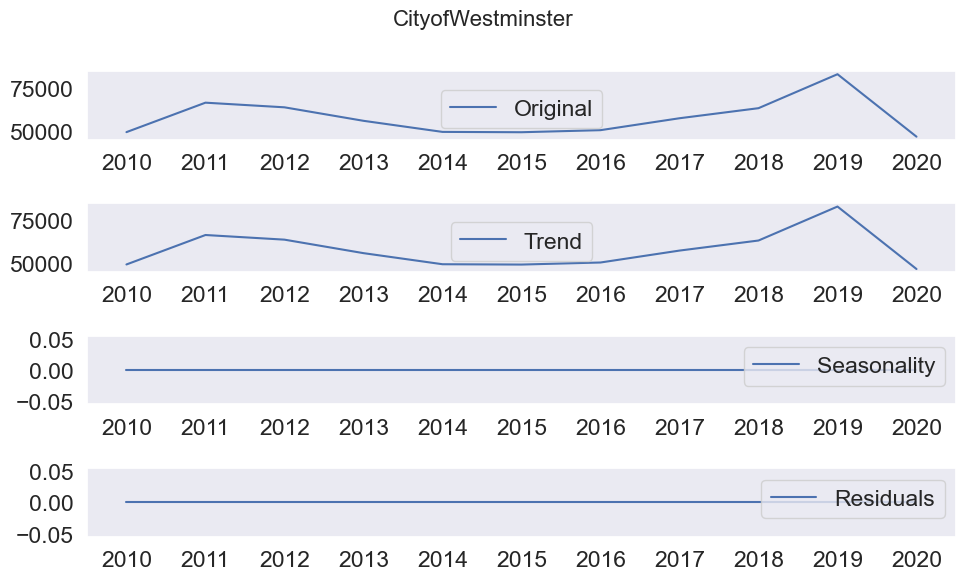

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 假设数据存储在名为"CrimeNumber2010-2020.csv"的CSV文件中
data = pd.read_csv("CrimeNumber2010-2020.csv")

# 按区域进行分析
for borough in data["Borough_Name"].unique():
    # 选择区域
    borough_data = data[data["Borough_Name"] == borough]
    
    # 将年份和犯罪数量数据进行重塑
    crime_counts = borough_data.melt(id_vars=["Borough_Name", "Borough_code"], 
                                     var_name="Year", 
                                     value_name="Crime_number")
    crime_counts["Year"] = crime_counts["Year"].str[-4:]  # 取出年份
    crime_counts.set_index("Year", inplace=True)  # 设定年份为索引
    
    # 时间序列分解
    result = seasonal_decompose(crime_counts["Crime_number"], model='additive', period=1)
    
    # 绘图
    plt.figure(figsize=(10,6))
    plt.suptitle(borough, fontsize=16)
    plt.subplot(411)
    plt.plot(result.observed, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(result.seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(result.resid, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


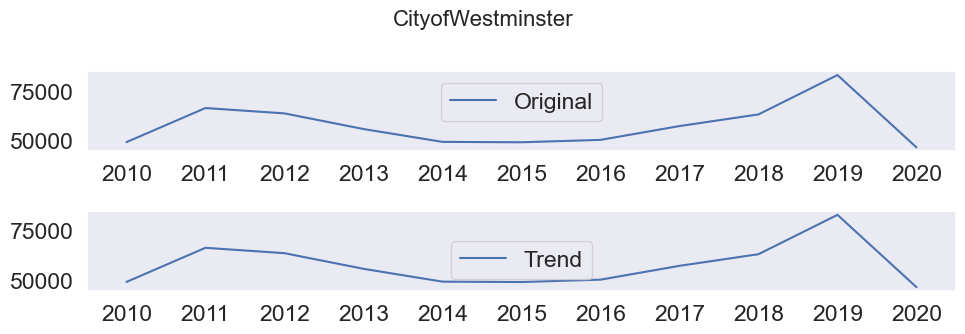

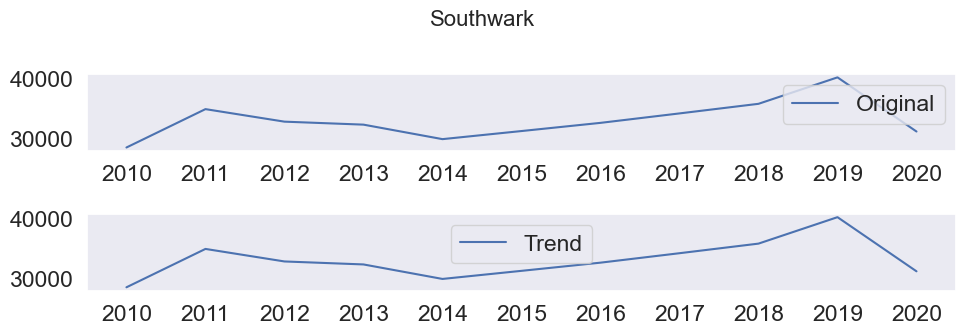

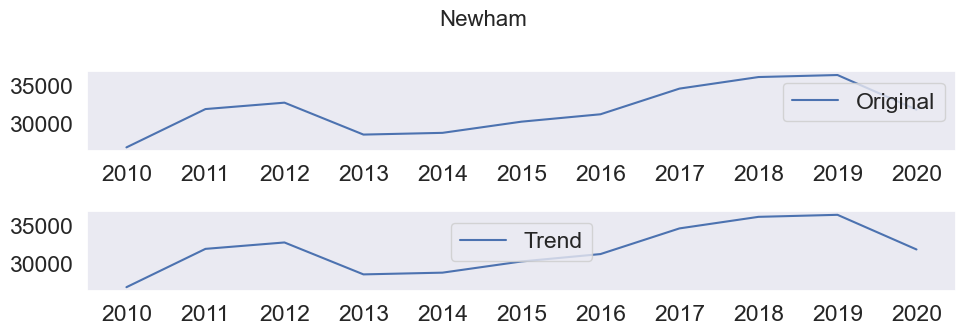

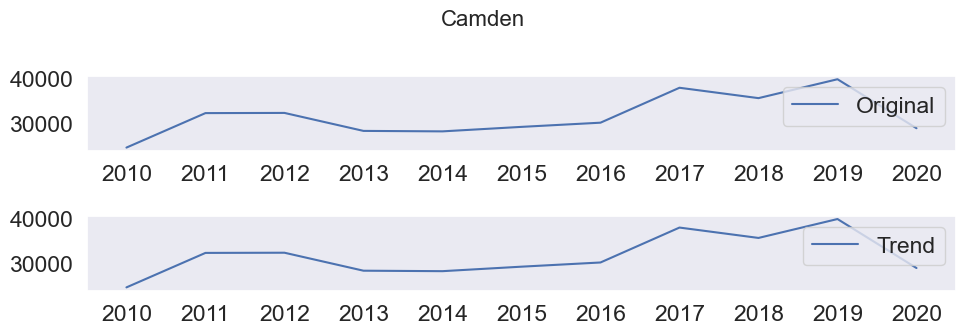

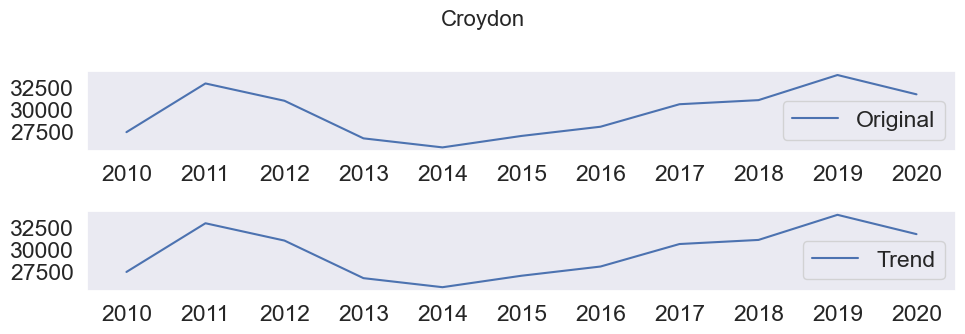

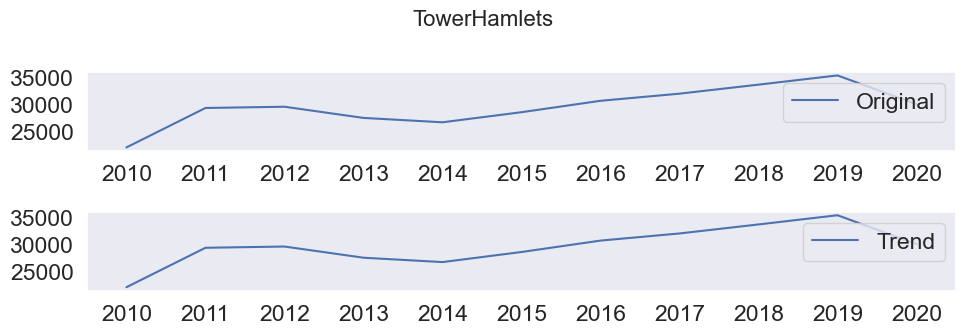

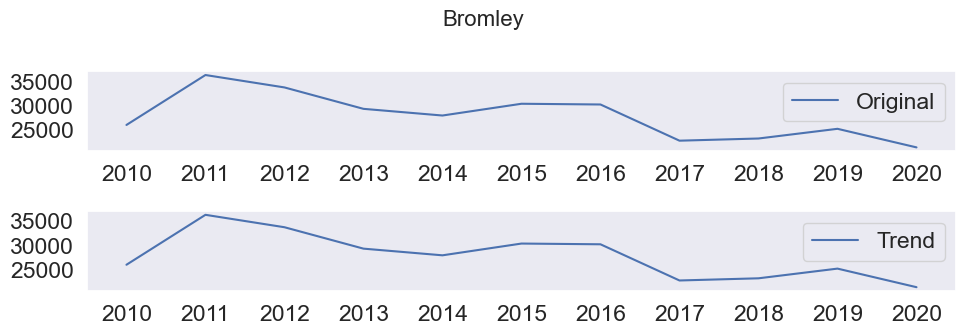

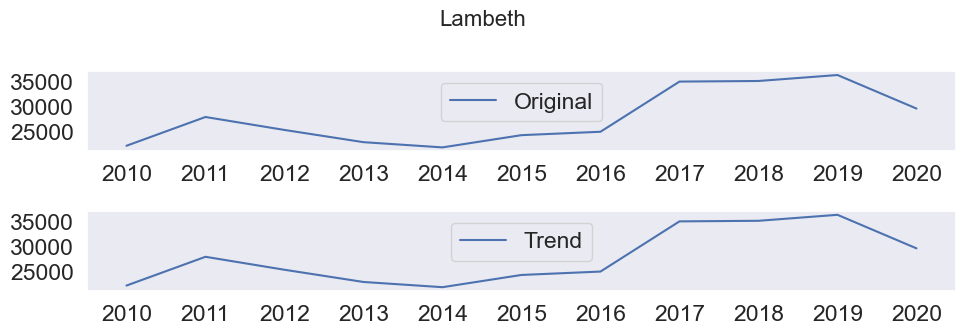

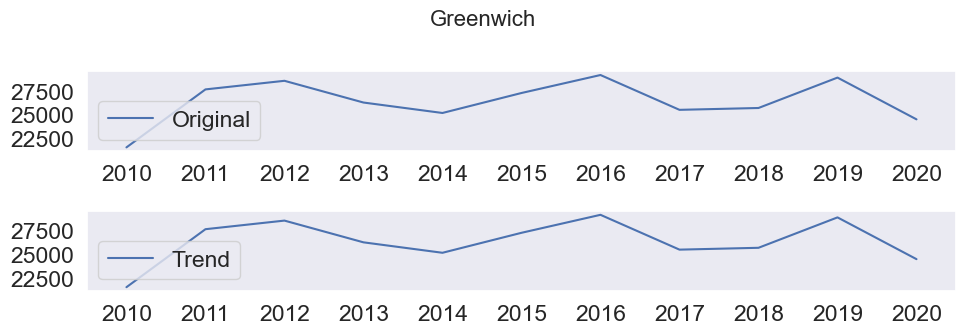

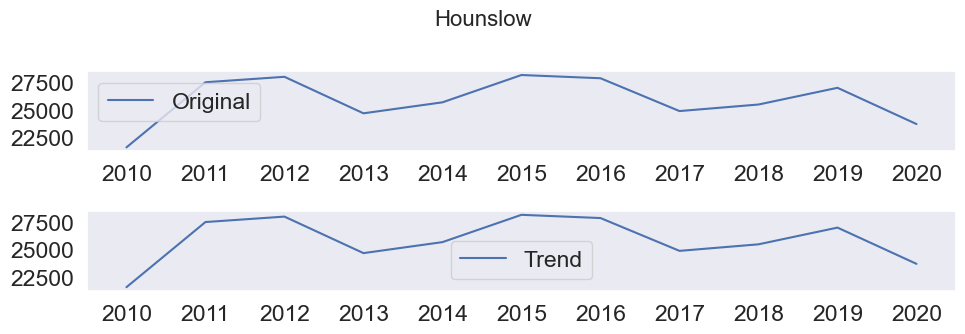

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 假设数据存储在名为"crime_data.csv"的CSV文件中
data = pd.read_csv("CrimeNumber2010-2020.csv")

# 为每个区域计算总犯罪数
data['total_crime'] = data.loc[:, '2010':'2020'].sum(axis=1)

# 选择犯罪数最多的前十个区域
top10_boroughs = data.sort_values(by='total_crime', ascending=False)['Borough_Name'].head(10).values

# 对前十个区域进行时间序列分析
for borough in top10_boroughs:
    # 选择区域
    borough_data = data[data["Borough_Name"] == borough]
    
    # 按年份累积犯罪数量
    crime_counts = borough_data.loc[:, '2010':'2020'].sum()
    
    # 时间序列分解
    result = seasonal_decompose(crime_counts, model='additive', period=1)
    
    # 绘图
    plt.figure(figsize=(10,6))
    plt.suptitle(borough, fontsize=16)
    plt.subplot(411)
    plt.plot(result.observed, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='best')
    # plt.subplot(413)
    # plt.plot(result.seasonal,label='Seasonality')
    # plt.legend(loc='best')
    # plt.subplot(414)
    # plt.plot(result.resid, label='Residuals')
    # plt.legend(loc='best')
    plt.tight_layout()
    plt.show()


### Build a cart

CART is a good unit for ensemble learning because training it is relatively easy and cheap, and it makes no assumptions on input data.To achieve this, the available data sets are randomly divided into training and test data sets.
After dividing the data into training and test sets, we will compare the prediction modles to find out the best prediction model.

In [33]:
random_state_split = 200
train_x, test_x, train_y, test_y = train_test_split(df.drop(['Crime_number'], axis = 1), valuation.house_price_of_unit_area, random_state=random_state_split)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# Check that the indices of train_x and train_y are identical, as the index indicates which rows from the original data are being used.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

AttributeError: 'DataFrame' object has no attribute 'house_price_of_unit_area'

During the regression modelling process, the training dataset will be used to train the model and determine the best hyperparameters which are max depth and min sample split. The testing dataset will only be utilized to evaluate the performance of the finalized model.


In [ ]:
# a CART using default settings
cart_default = DecisionTreeRegressor(random_state=0)
cart_default.fit(train_x, train_y)
# print the tree depth
print("Tree depth: {}".format(cart_default.get_depth()))

Tree depth: 21


<div><h4>Build a regression tree </h4></div>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=0)
reg_tree.fit(train_x, train_y)


DecisionTreeRegressor(random_state=0)

In [ ]:
print("R2 on the training data:")
print(reg_tree.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(reg_tree.score(X=test_x, y=test_y))

R2 on the training data:
0.9912577051687722
R2 on the testing data:
0.44121751021349


Due to the significant discrepancy between the R2 values of the testing and training data, it appears that overfitting has occurred, which means that the model has fit very well to the training data but does not perform well on unseen data. To reduce the risk of overfitting or underfitting caused by uneven data partitioning, cross-validation is selected.


In [ ]:
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
dt = DecisionTreeRegressor(random_state=randomState_dt)

# cv=5 by default, which means 5-fold cross-validation
clf = GridSearchCV(dt, hyperparameters)

clf.fit(train_x, train_y)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 10}
The best score is: 
0.49656794740472765


<div><h4>Training the final cart </h4></div>

In [ ]:
dt_final = DecisionTreeRegressor(max_depth=clf.best_params_['max_depth'], min_samples_split=clf.best_params_['min_samples_split'], random_state=randomState_dt)
dt_final.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=10000)

In [ ]:
print("R2 on the training data:")
print(dt_final.score(X=train_x, y=train_y))
print("R2 on the testing data:")
print(dt_final.score(X=test_x, y=test_y))

R2 on the training data:
0.8908534338771044
R2 on the testing data:
0.5321289038244179


RMSE (Root Mean Squared Error) is a metric used to measure the accuracy of a regression model by calculating the square root of the average of the squared differences between the predicted and actual values. The lower the RMSE value, the better the model's prediction accuracy. Therefore, it means that the model has already achieved a high level of accuracy.